In [1]:
%load_ext nb_black
import os
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, ScalarFormatter, FormatStrFormatter

plt.style.reload_library()
plt.style.use(["science", "no-latex", "ieee"])

# sns.set_theme(context="paper", style="whitegrid", palette="colorblind")

pd.set_option("display.float_format", lambda x: "%.8g" % x)
pd.set_option("precision", 8)

OptionError: 'Pattern matched multiple keys'

<IPython.core.display.Javascript object>

In [ ]:
workdir = "."
file = os.path.join(workdir, "results.csv")
results = pd.read_csv(file)

<IPython.core.display.Javascript object>

In [ ]:
file = os.path.join(workdir, "direct.csv")
direct = pd.read_csv(file)
direct["rate"] = 8e9
direct["method"] = "Direct"
direct.drop("name", inplace=True, axis=1)
direct.dropna(inplace=True)
direct["name"] = "direct"
results = pd.concat([results, direct])

<IPython.core.display.Javascript object>

In [ ]:
file = os.path.join(workdir, "OFdirect.csv")
direct = pd.read_csv(file)
direct.dropna(inplace=True)
direct["name"] = "OFdirect"
results = pd.concat([results, direct])

<IPython.core.display.Javascript object>

In [ ]:
results.reset_index(inplace=True)
results.drop(["Unnamed: 0", "index"], inplace=True, axis=1)
results["section"] = results["target"] // 500e6

df_shift = results
df_shift["shift"] = df_shift["freq"] - df_shift["target"]

df_amps = results
new_df = results
results

ofs  pts    method        target          rate  \
0   1.600111e+09   10        OF  1.600111e+08 7.2004995e+09   
1   1.600111e+09   10        MS  1.600111e+08 7.4671847e+09   
2   1.661711e+09   10        OF  1.661711e+08 7.4776995e+09   
3   1.661711e+09   10        MS  1.661711e+08 7.2007477e+09   
4   2.057311e+09   10        OF  2.057311e+08 7.2005885e+09   
..           ...  ...       ...           ...           ...   
583 6.400111e+09  2.5  OFDirect 2.5600444e+09 7.6801332e+09   
584 6.480111e+09  2.5  OFDirect 2.5920444e+09 7.7761332e+09   
585 6.666711e+09  2.5  OFDirect 2.6666844e+09 7.7778295e+09   
586 6.857311e+09  2.5  OFDirect 2.7429244e+09 7.8369269e+09   
587 7.000111e+09  2.5  OFDirect 2.8000444e+09 7.8751249e+09   

                     name    amp          freq   L   M  section    shift  
0    sin10_1600111000_opt  3.101 1.6001109e+08 nan nan        0  -13.687  
1     sin10_1600111000_ms  3.109 1.6001109e+08 nan nan        0  -12.754  
2    sin10_1661711000_opt  3.096 1.6617109e+08 nan nan        0  -13.789  
3     sin10_1661711000_ms  3.108 1.6617109e+08 nan nan        0  -13.546  
4    sin10_2057311000_opt  3.136 2.0573108e+08 nan nan        0  -17.433  
..                    ...    ...           ...  ..  ..      ...      ...  
583              OFdirect  1.284 2.5600442e+09   6   5        5 -176.342  
584              OFdirect  0.951 2.5920442e+09   6   5        5 -177.033  
585              OFdirect  0.025 2.6666842e+09   7   6        5 -183.053  
586              OFdirect -0.234 2.7429242e+09   8   7        5 -172.946  
587              OFdirect -0.287 2.8000442e+09   9   8        5 -182.715  

[588 rows x 12 columns]

<IPython.core.display.Javascript object>

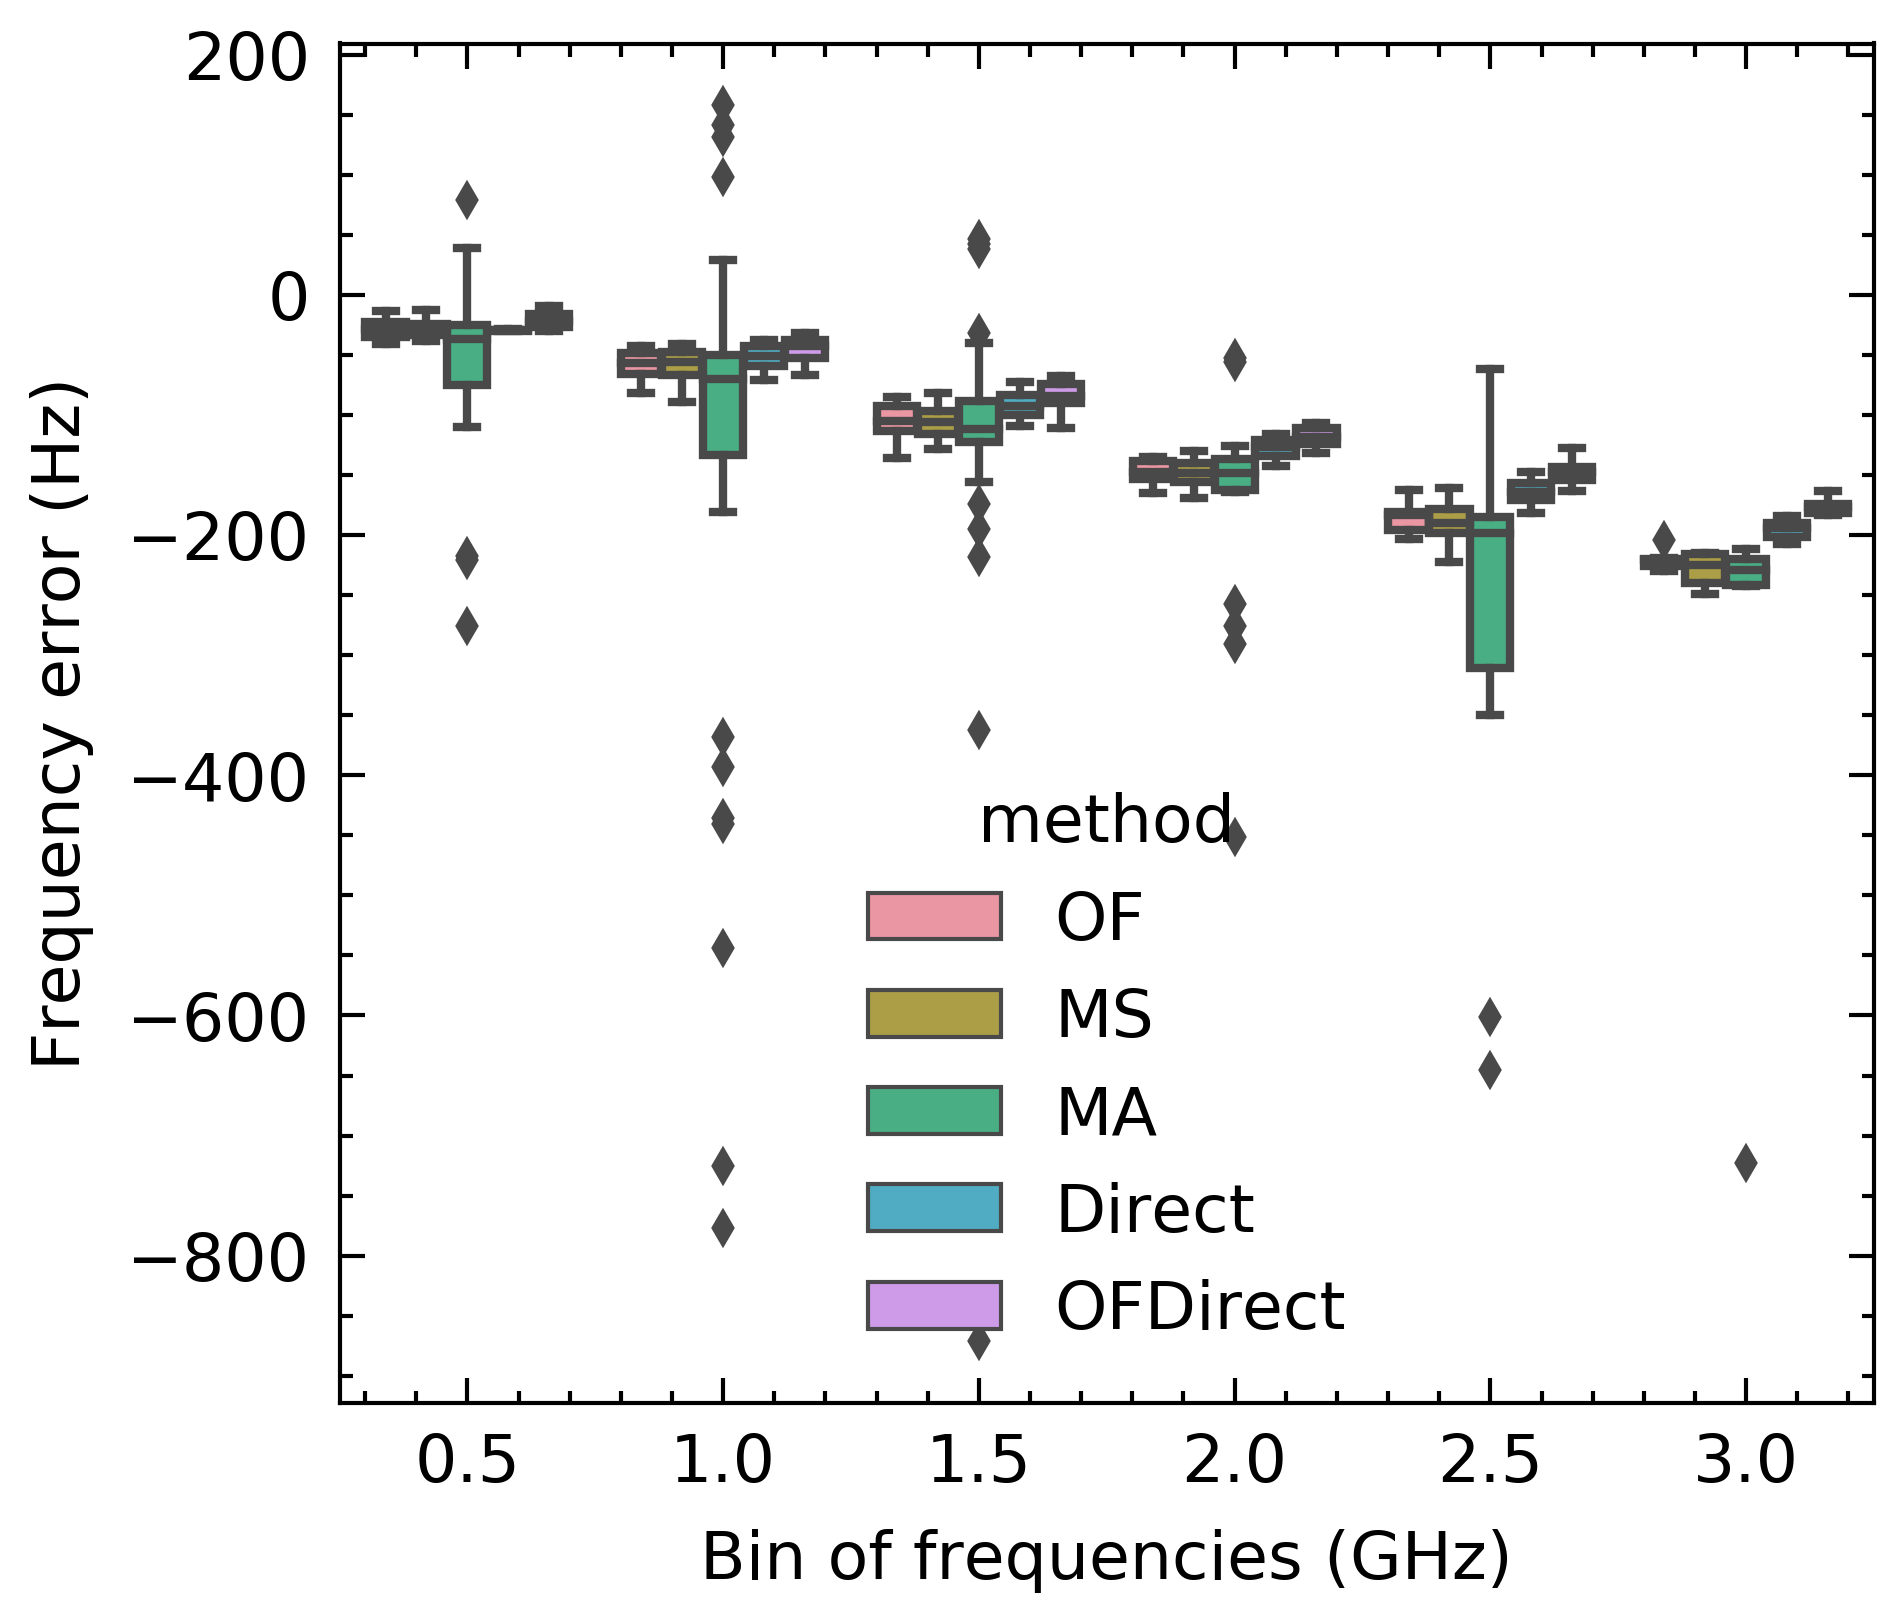

<IPython.core.display.Javascript object>

In [ ]:
# 分析频率偏移与目标频率的关系。
ax = sns.boxplot(
    data=df_shift,
    x="section",
    y="shift",
    hue="method",
    fliersize=2,
)
ax.set(xlabel="Bin of frequencies (GHz)")
ax.set(ylabel="Frequency error (Hz)")

ticks = ax.get_xticks()
xlabels = ["%.1f" % (x * 0.5 + 0.5) for x in ticks]
ax.set_xticklabels(xlabels)

# handles, labels = ax.get_legend_handles_labels()
# ax.legend(
#     loc="lower left",
#     handles=handles,
#     labels=["OF", "SF(MS)", "MA", "Direct", "OFDirect"],
# )

ax.figure.set_size_inches(3.3, 3)

file = os.path.join(workdir, "figures", "freq2shift.pdf")
ax.get_figure().savefig(file)

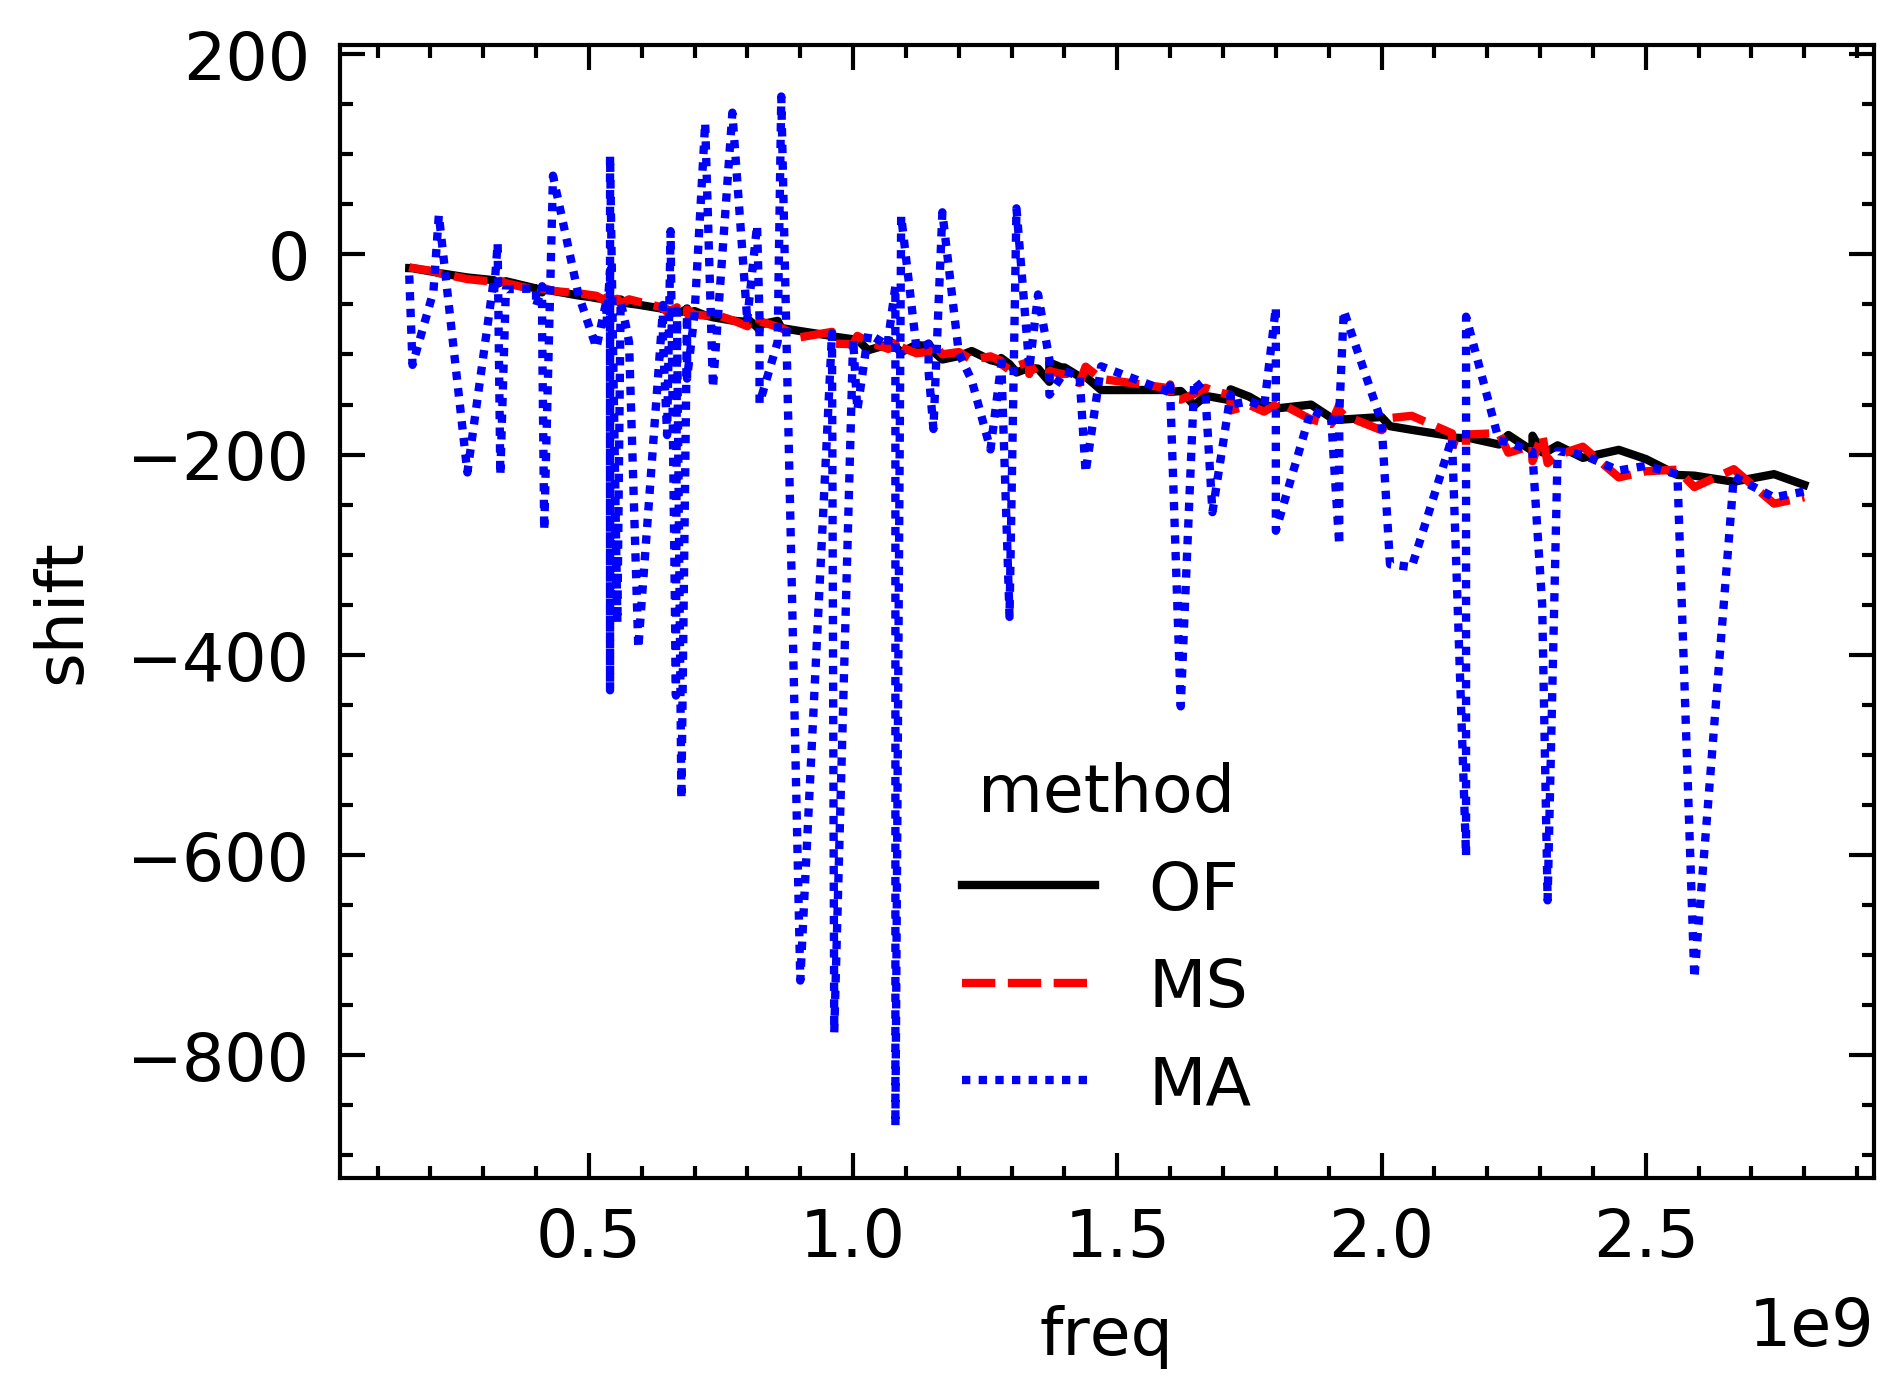

<IPython.core.display.Javascript object>

In [ ]:
ax = sns.lineplot(
    data=df_shift,
    x="freq",
    y="shift",
    hue="method",
    style="method",
    linewidth=1,
)

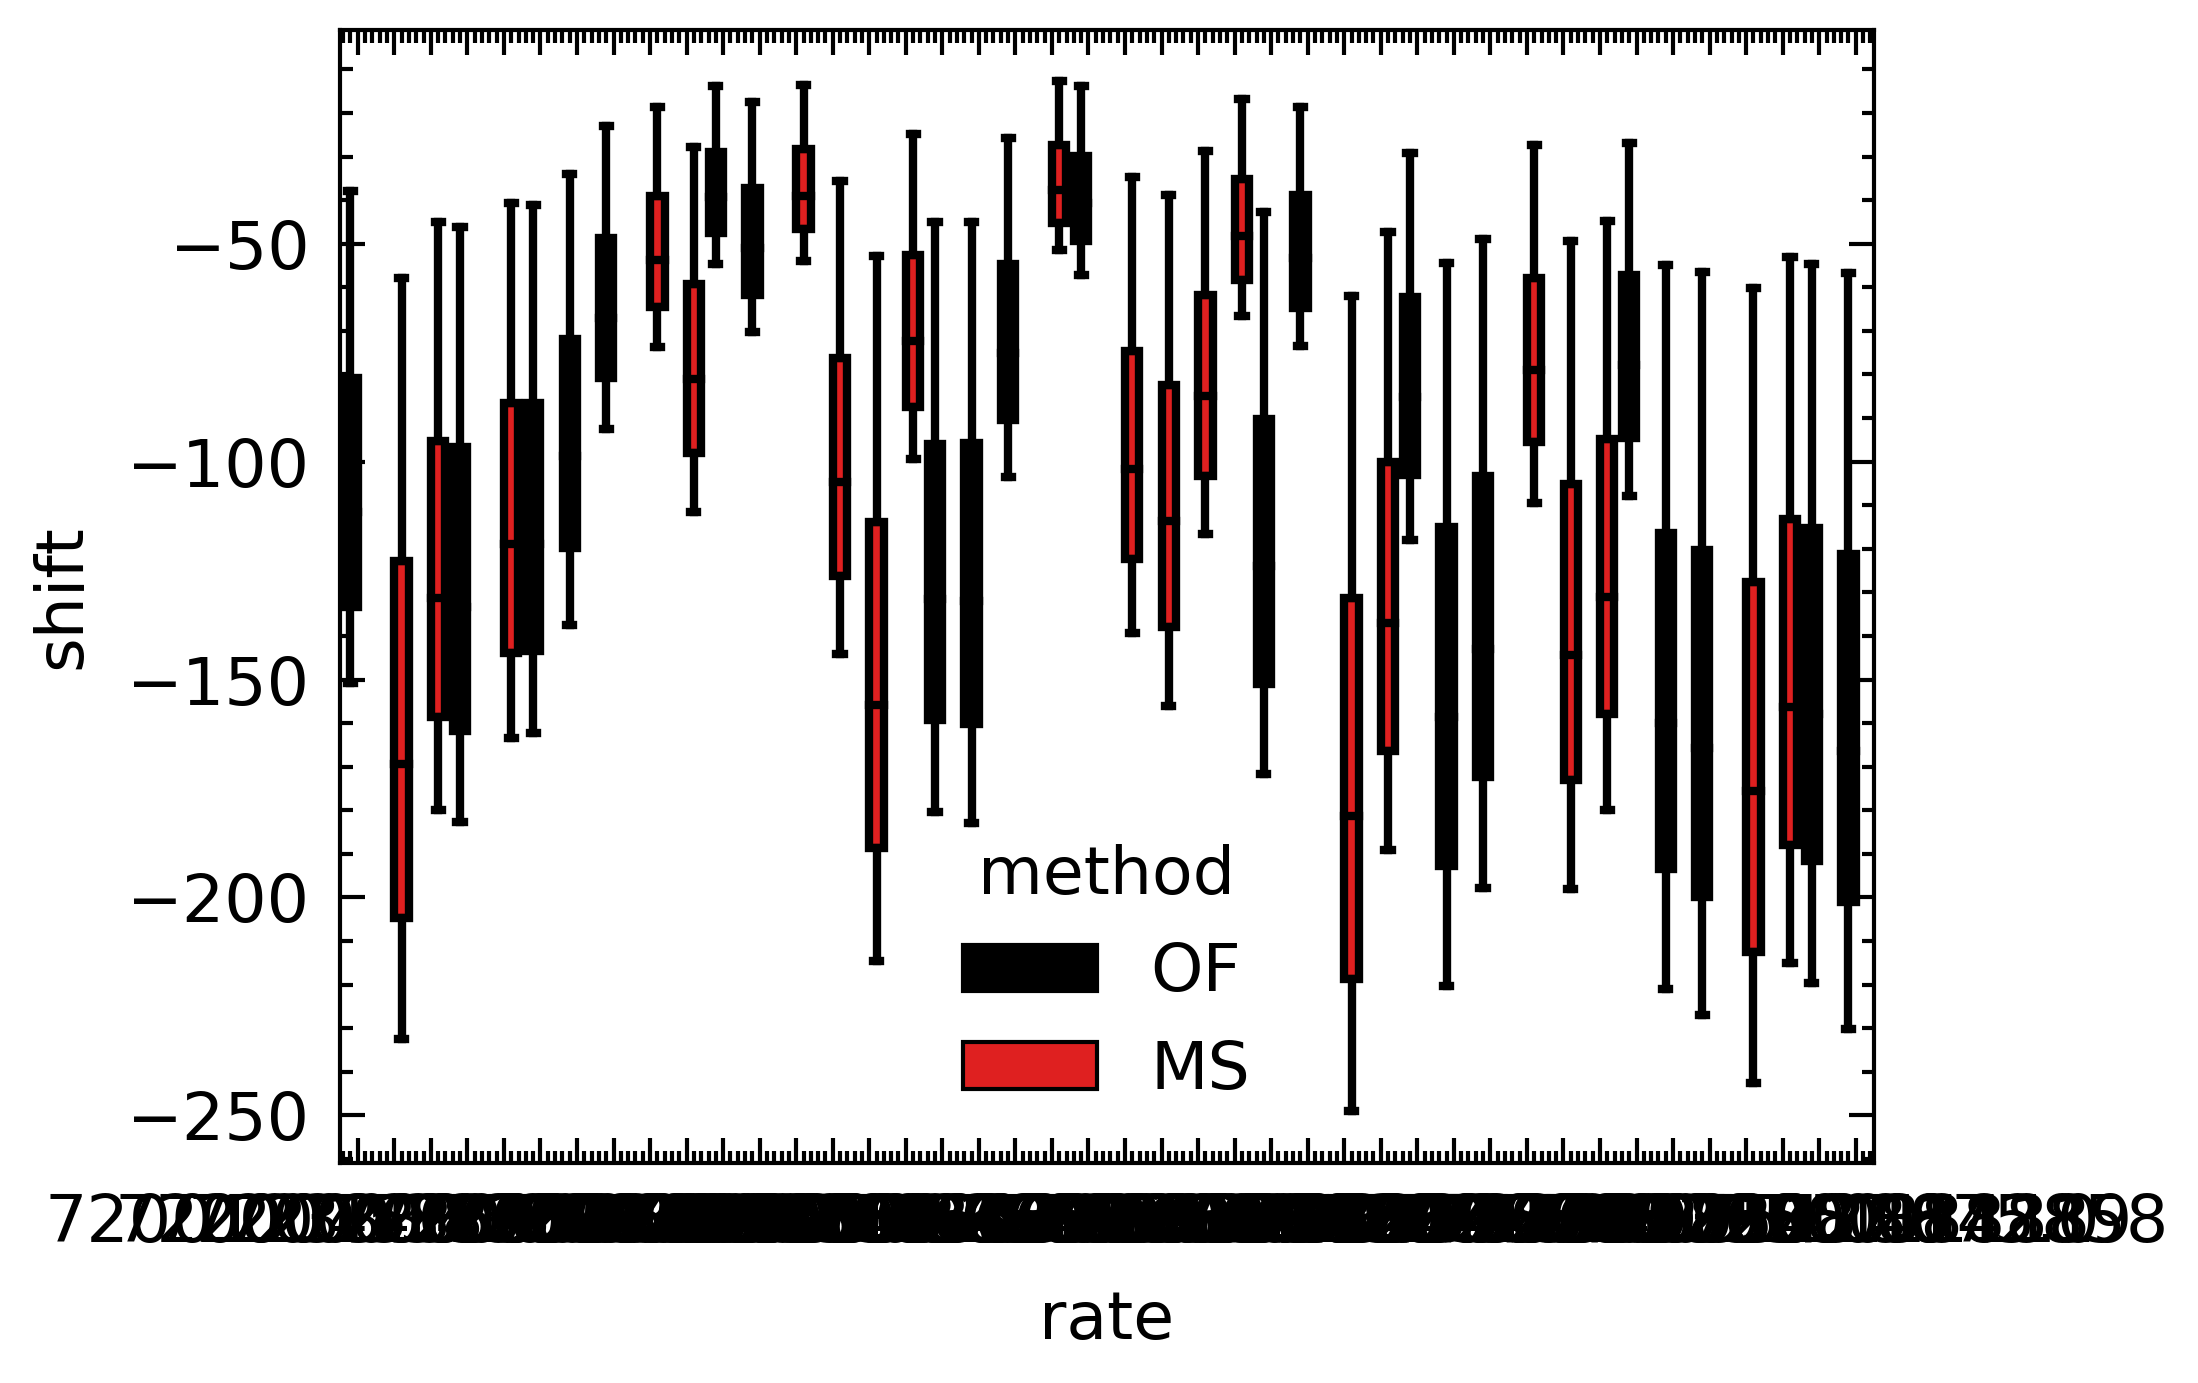

<IPython.core.display.Javascript object>

In [ ]:
# 证明采样率和频率偏移之间没有必然相关性。
ax = sns.boxplot(
    data=df_shift[df_shift["method"] != "MA"],
    x="rate",
    y="shift",
    hue="method",
    fliersize=2,
)

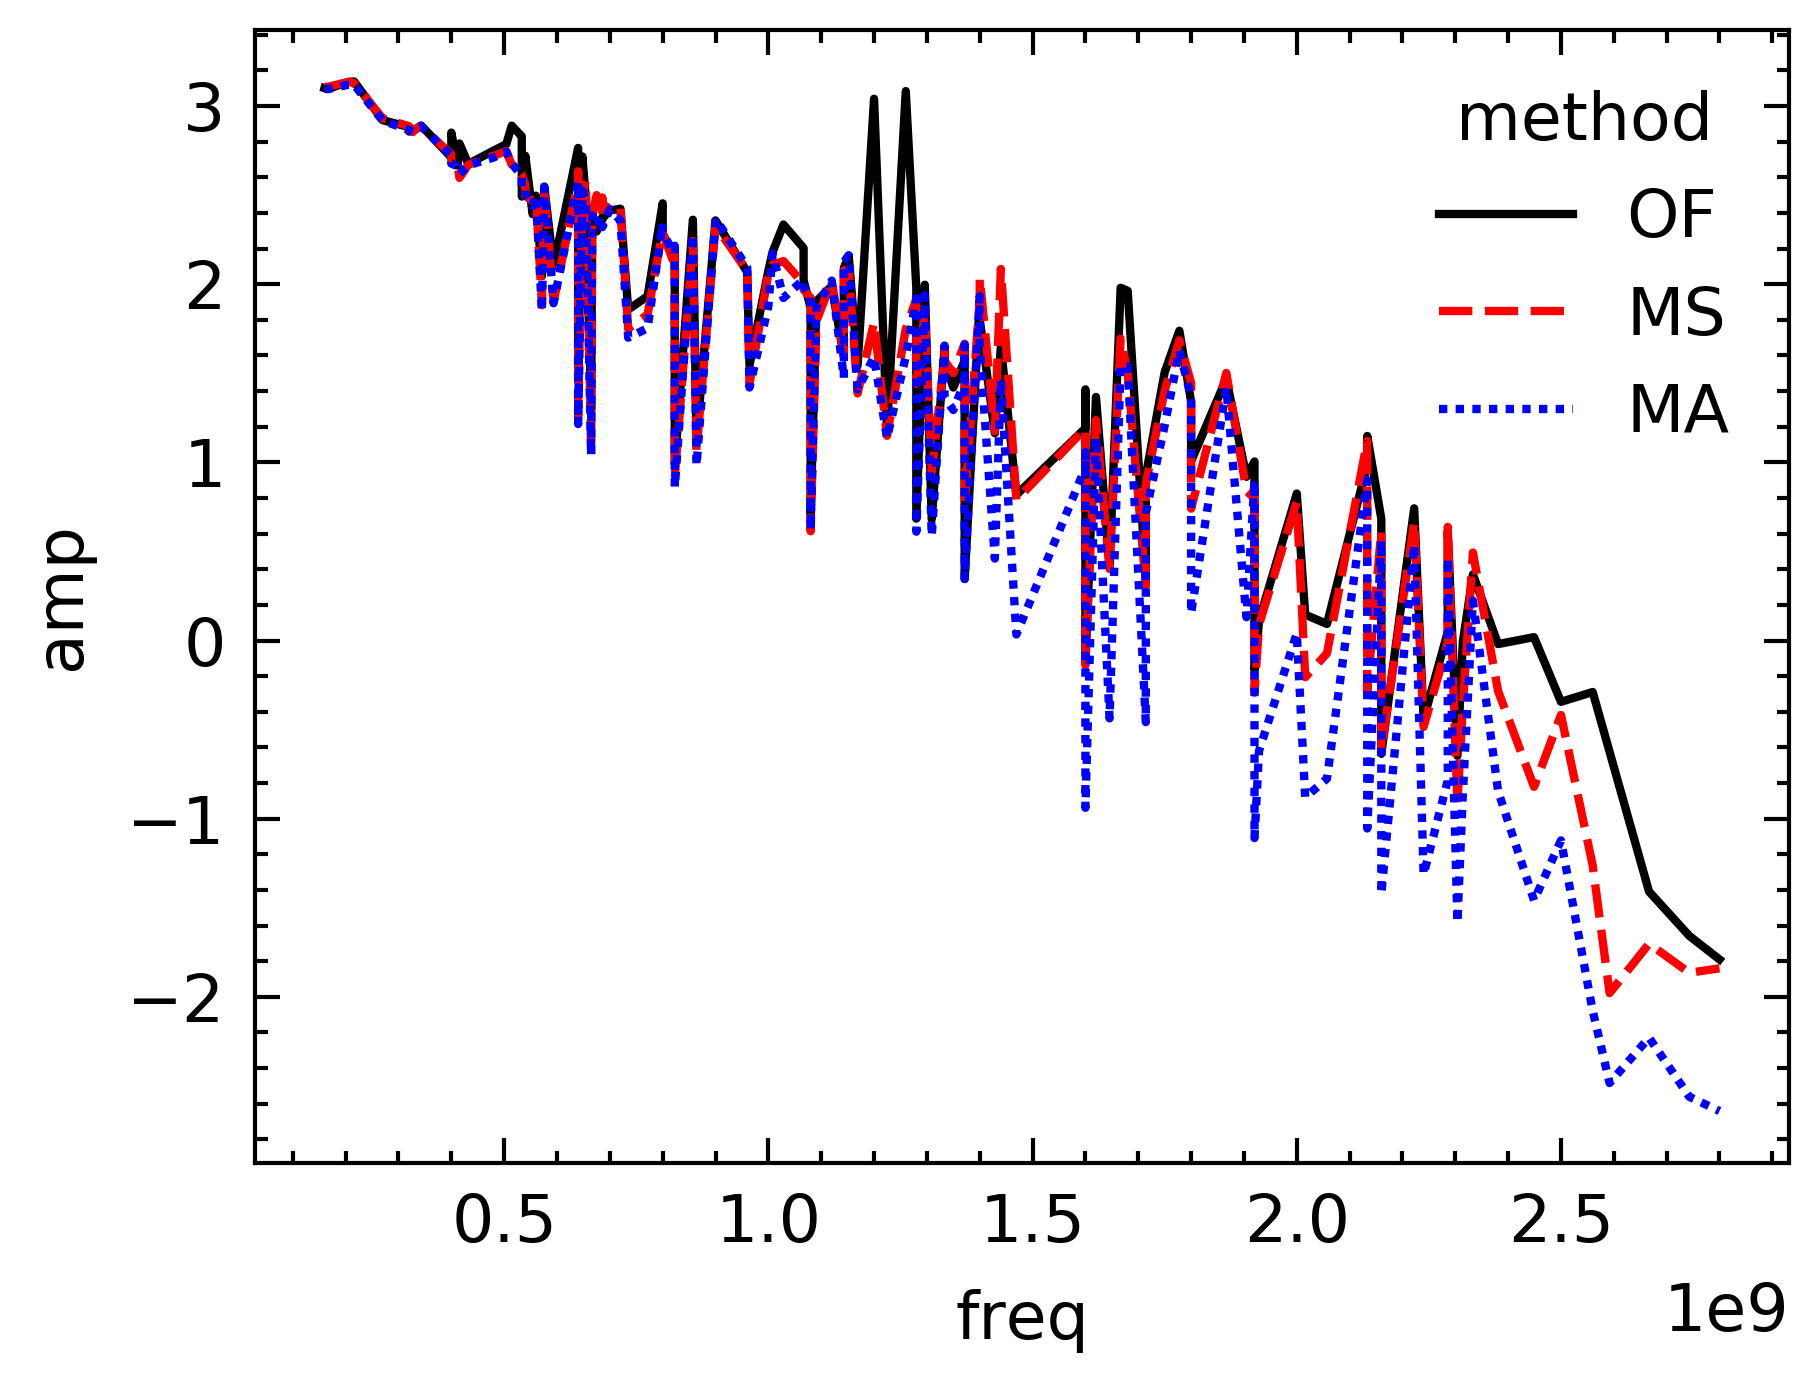

<IPython.core.display.Javascript object>

In [ ]:
sns.lineplot(data=df_amps, x="freq", y="amp", hue="method", style="method")

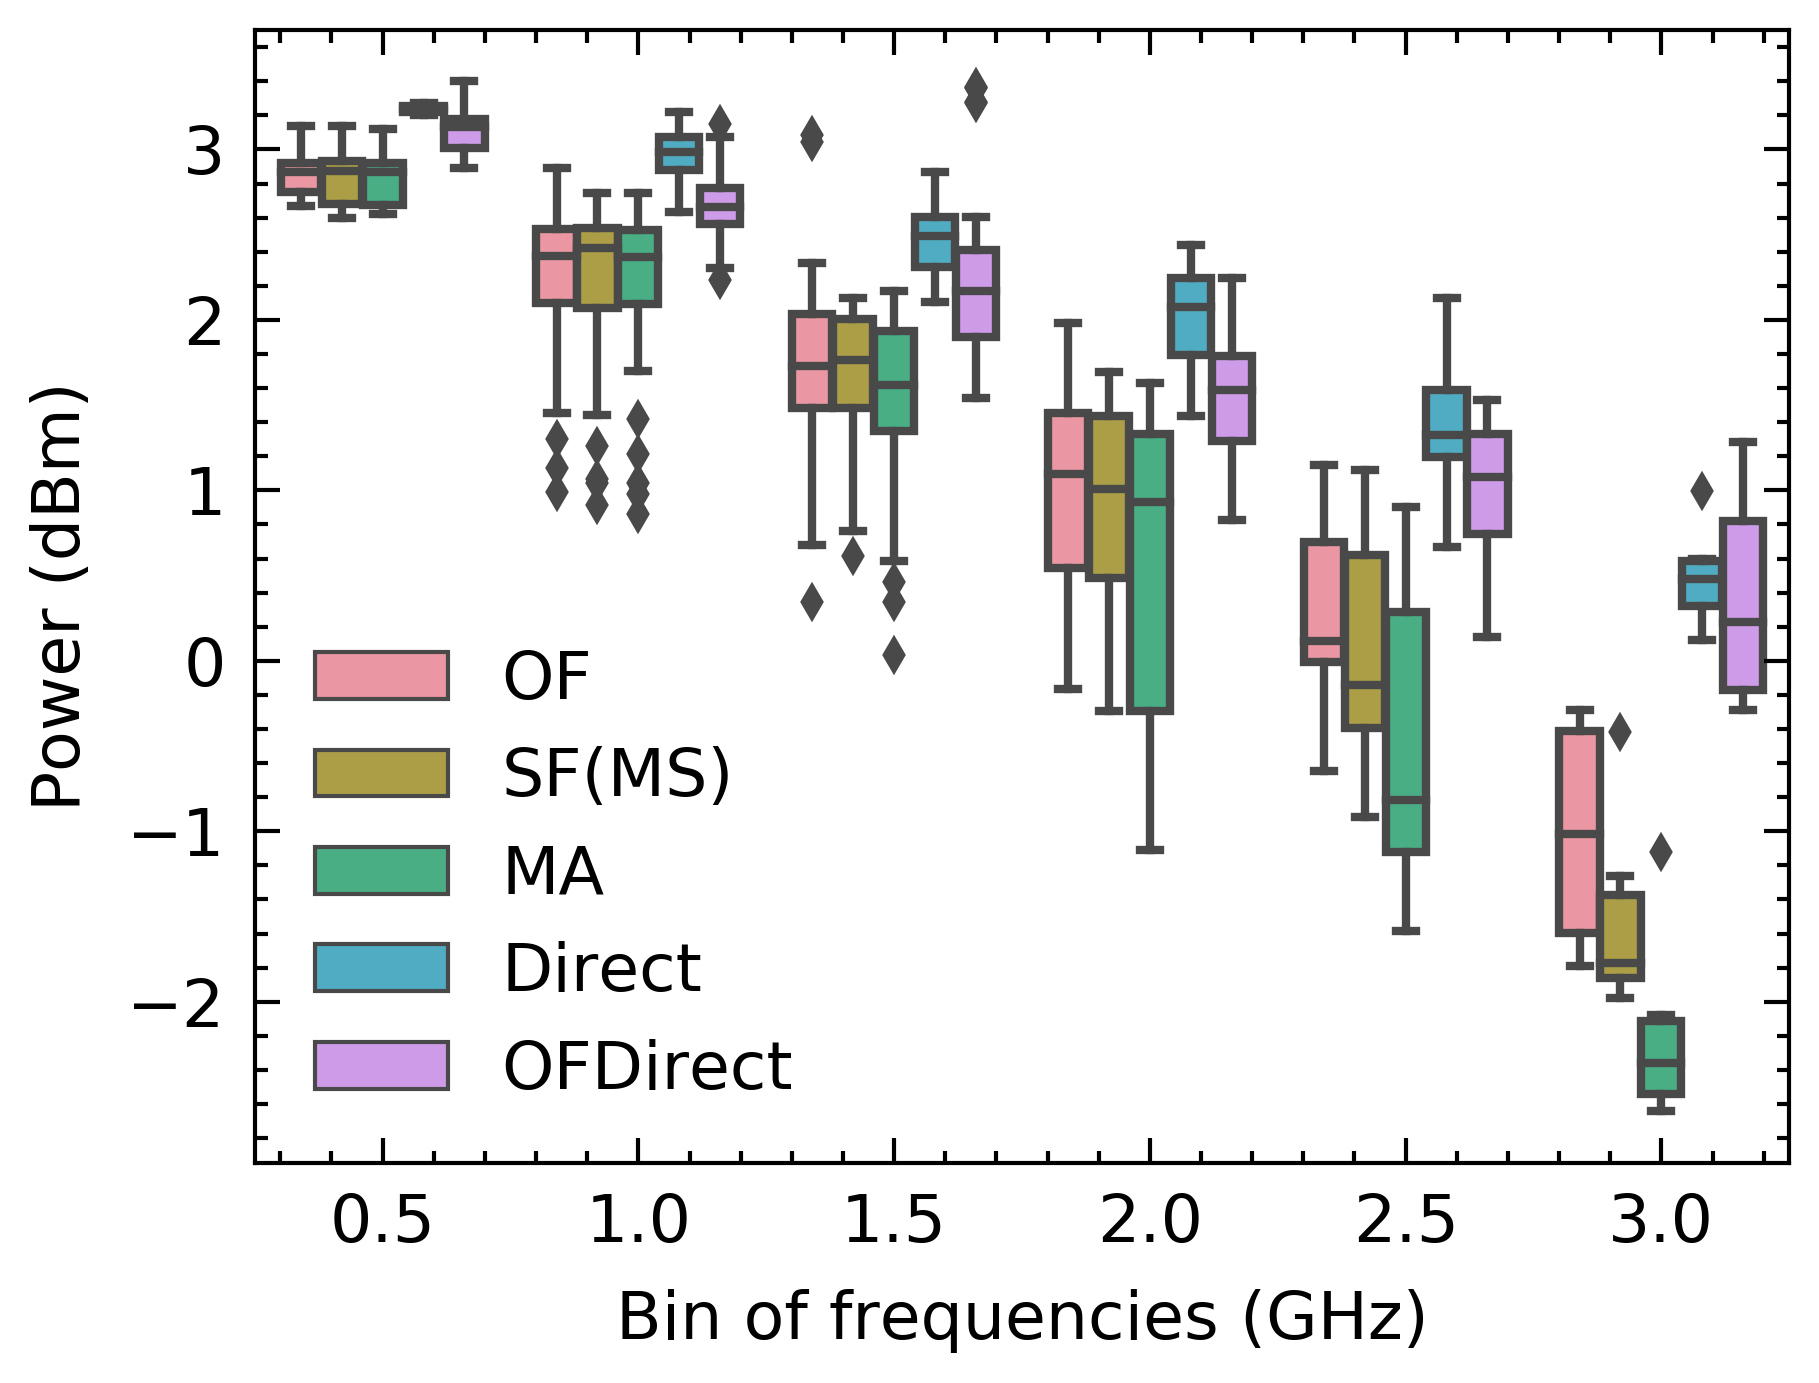

<IPython.core.display.Javascript object>

In [ ]:
ax = sns.boxplot(
    data=df_amps,
    x="section",
    y="amp",
    hue="method",
    fliersize=2,
)

ax.set(xlabel="Bin of frequencies (GHz)")
ax.set(ylabel="Power (dBm)")

ticks = ax.get_xticks()
xlabels = ["%.1f" % (x * 0.5 + 0.5) for x in ticks]
ax.set_xticklabels(xlabels)

handles, labels = ax.get_legend_handles_labels()
ax.legend(
    loc="lower left",
    title="",
    handles=handles,
    labels=["OF", "SF(MS)", "MA", "Direct", "OFDirect"],
)

file = os.path.join(workdir, "figures", "freq2amp.pdf")
ax.get_figure().savefig(file)

In [ ]:
sns.violinplot(
    data=new_df,
    x="pts",
    y="amp",
    #     split=True,
    hue="method",
    inner="quart",
    linewidth=1,
)
# sns.despine(left=True)

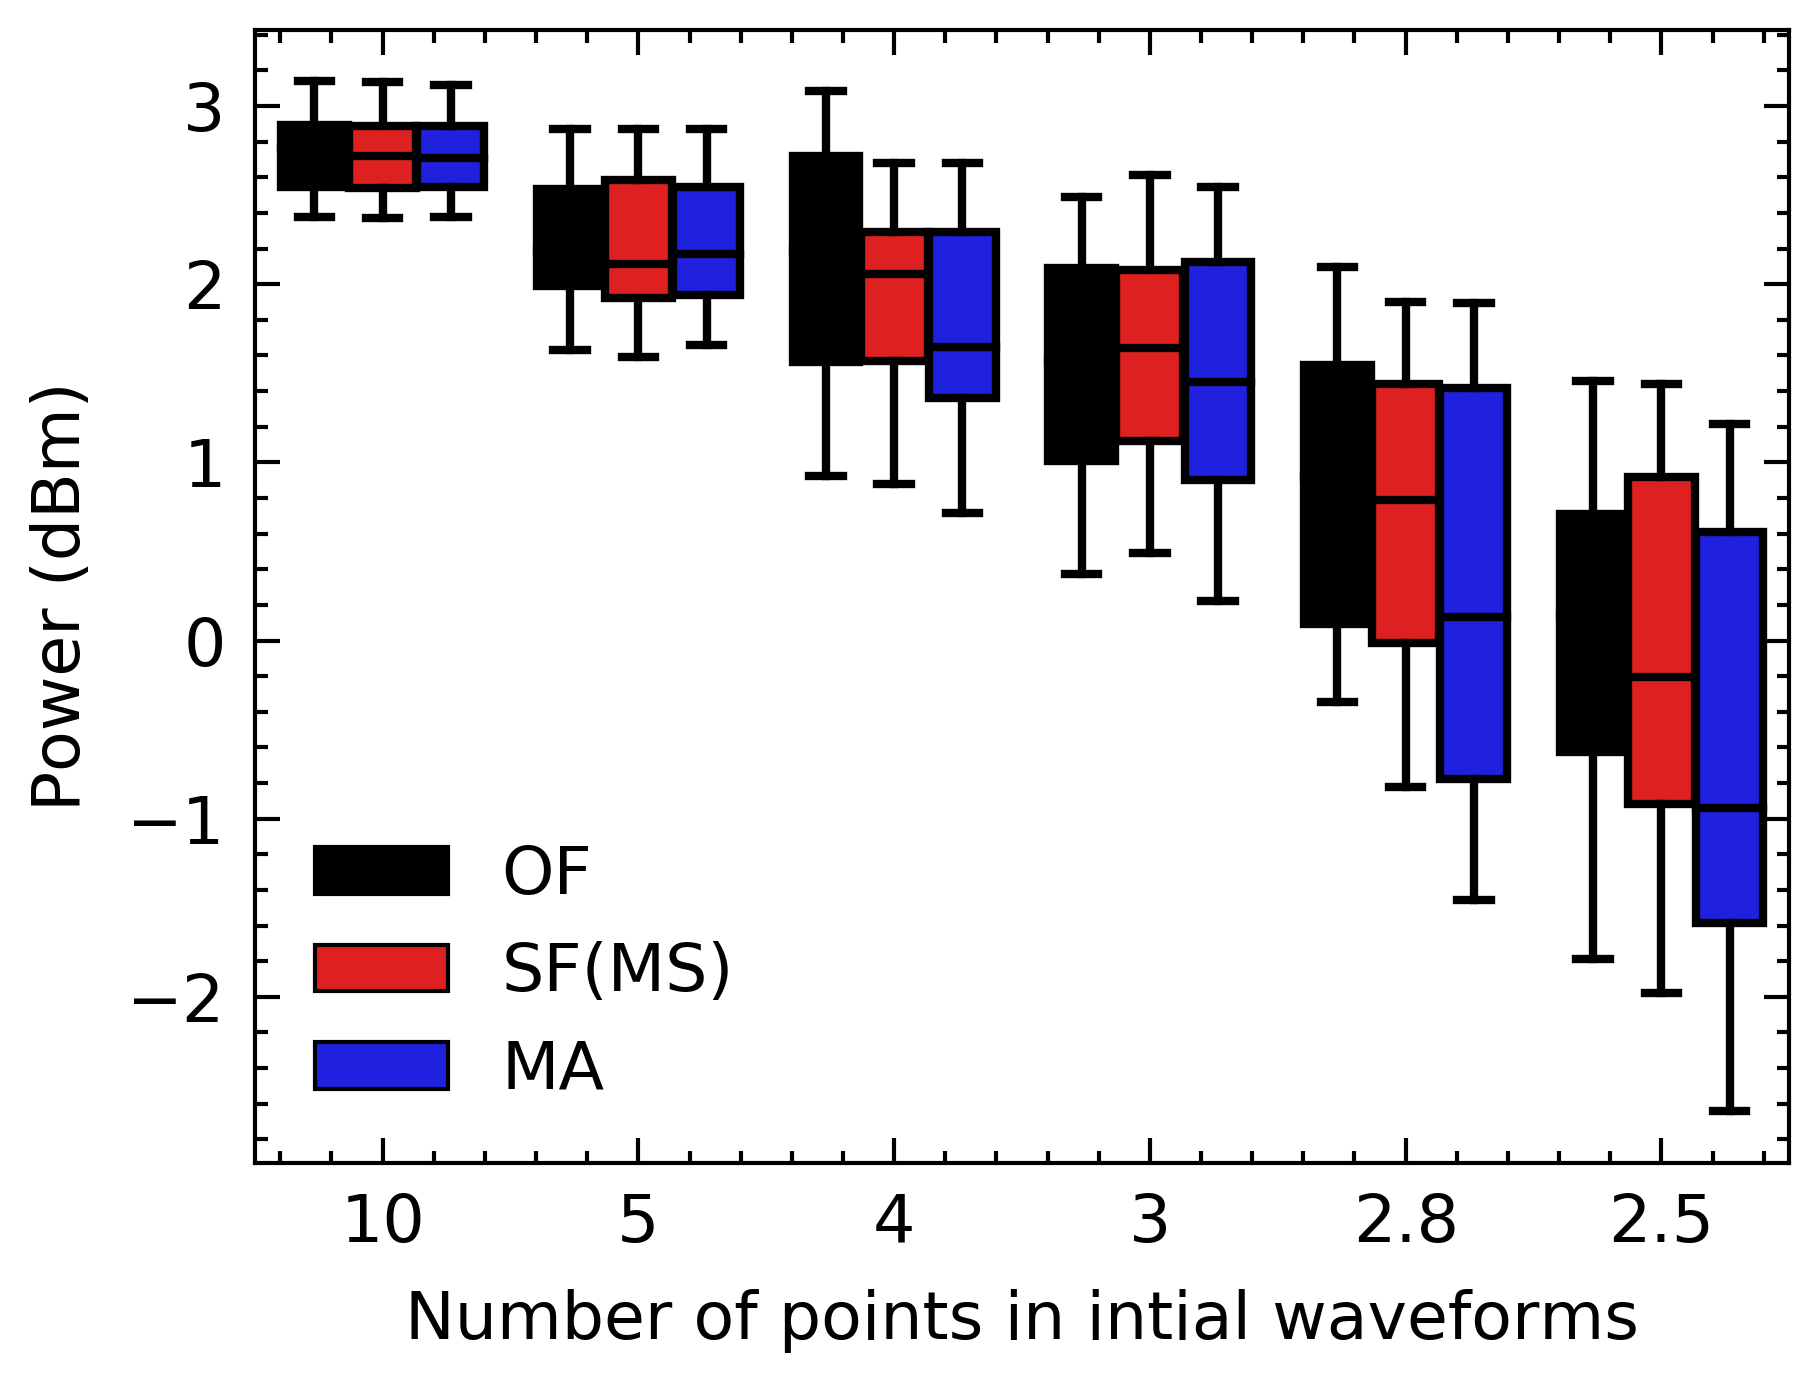

<IPython.core.display.Javascript object>

In [ ]:
pts = pd.unique(new_df["pts"])
ax = sns.boxplot(
    data=new_df,
    x="pts",
    y="amp",
    hue="method",
    order=pts,
    fliersize=2,
)
ax.legend(loc="lower left")
ax.set(xlabel="Number of points in intial waveforms")
ax.set(ylabel="Power (dBm)")

formatter = FormatStrFormatter("%g")
xlabels = formatter.format_ticks(pts)
ax.set_xticklabels(xlabels)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=["OF", "SF(MS)", "MA"])

file = os.path.join(workdir, "figures", "pts2amp.pdf")
ax.get_figure().savefig(file)

In [ ]:
sns.jointplot(x="freq", y="amp", data=new_df, kind="reg")

In [ ]:
new_df["amp"].describe()

count         378
mean    1.4810397
std     1.2502338
min        -2.641
25%       0.81975
50%        1.7985
75%       2.46225
max         3.138
Name: amp, dtype: float64

<IPython.core.display.Javascript object>

In [ ]:
import itertools

hue = "pts"


def draw_by_method(method, mks=None):
    target = new_df[new_df["method"] == method]
    if not mks:
        mks = itertools.cycle(["o", "x", "^", "+", "*", "s", "p", "D"])
    markers = [next(mks) for i in target[hue].unique()]
    ax = sns.lmplot(
        data=target,
        x="ofs",
        y="amp",
        hue=hue,
        #         col="method",
        markers=markers,
        palette="dark",
        legend_out=False,
        height=3,
        aspect=1.1,
        scatter_kws={"s": 20},
        line_kws={"linewidth": 1},
    )
    ax.set(xlabel="Sampling rate of intial waveforms (GS/s)")
    ax.set(ylabel="Power (dBm)")

    ax._legend.set_title("")
    subplots = ax.axes.flatten()

    ticks = subplots[0].get_xticks()
    xlabels = ["%.1f" % (x / 1e9) for x in ticks]
    subplots[0].set_xticklabels(xlabels)
    subplots[0].set_ylim(-3.0, 3.5)

    file = os.path.join(workdir, "figures", "ofs2amp_%s.pdf" % method)
    ax.fig.savefig(file)

<IPython.core.display.Javascript object>

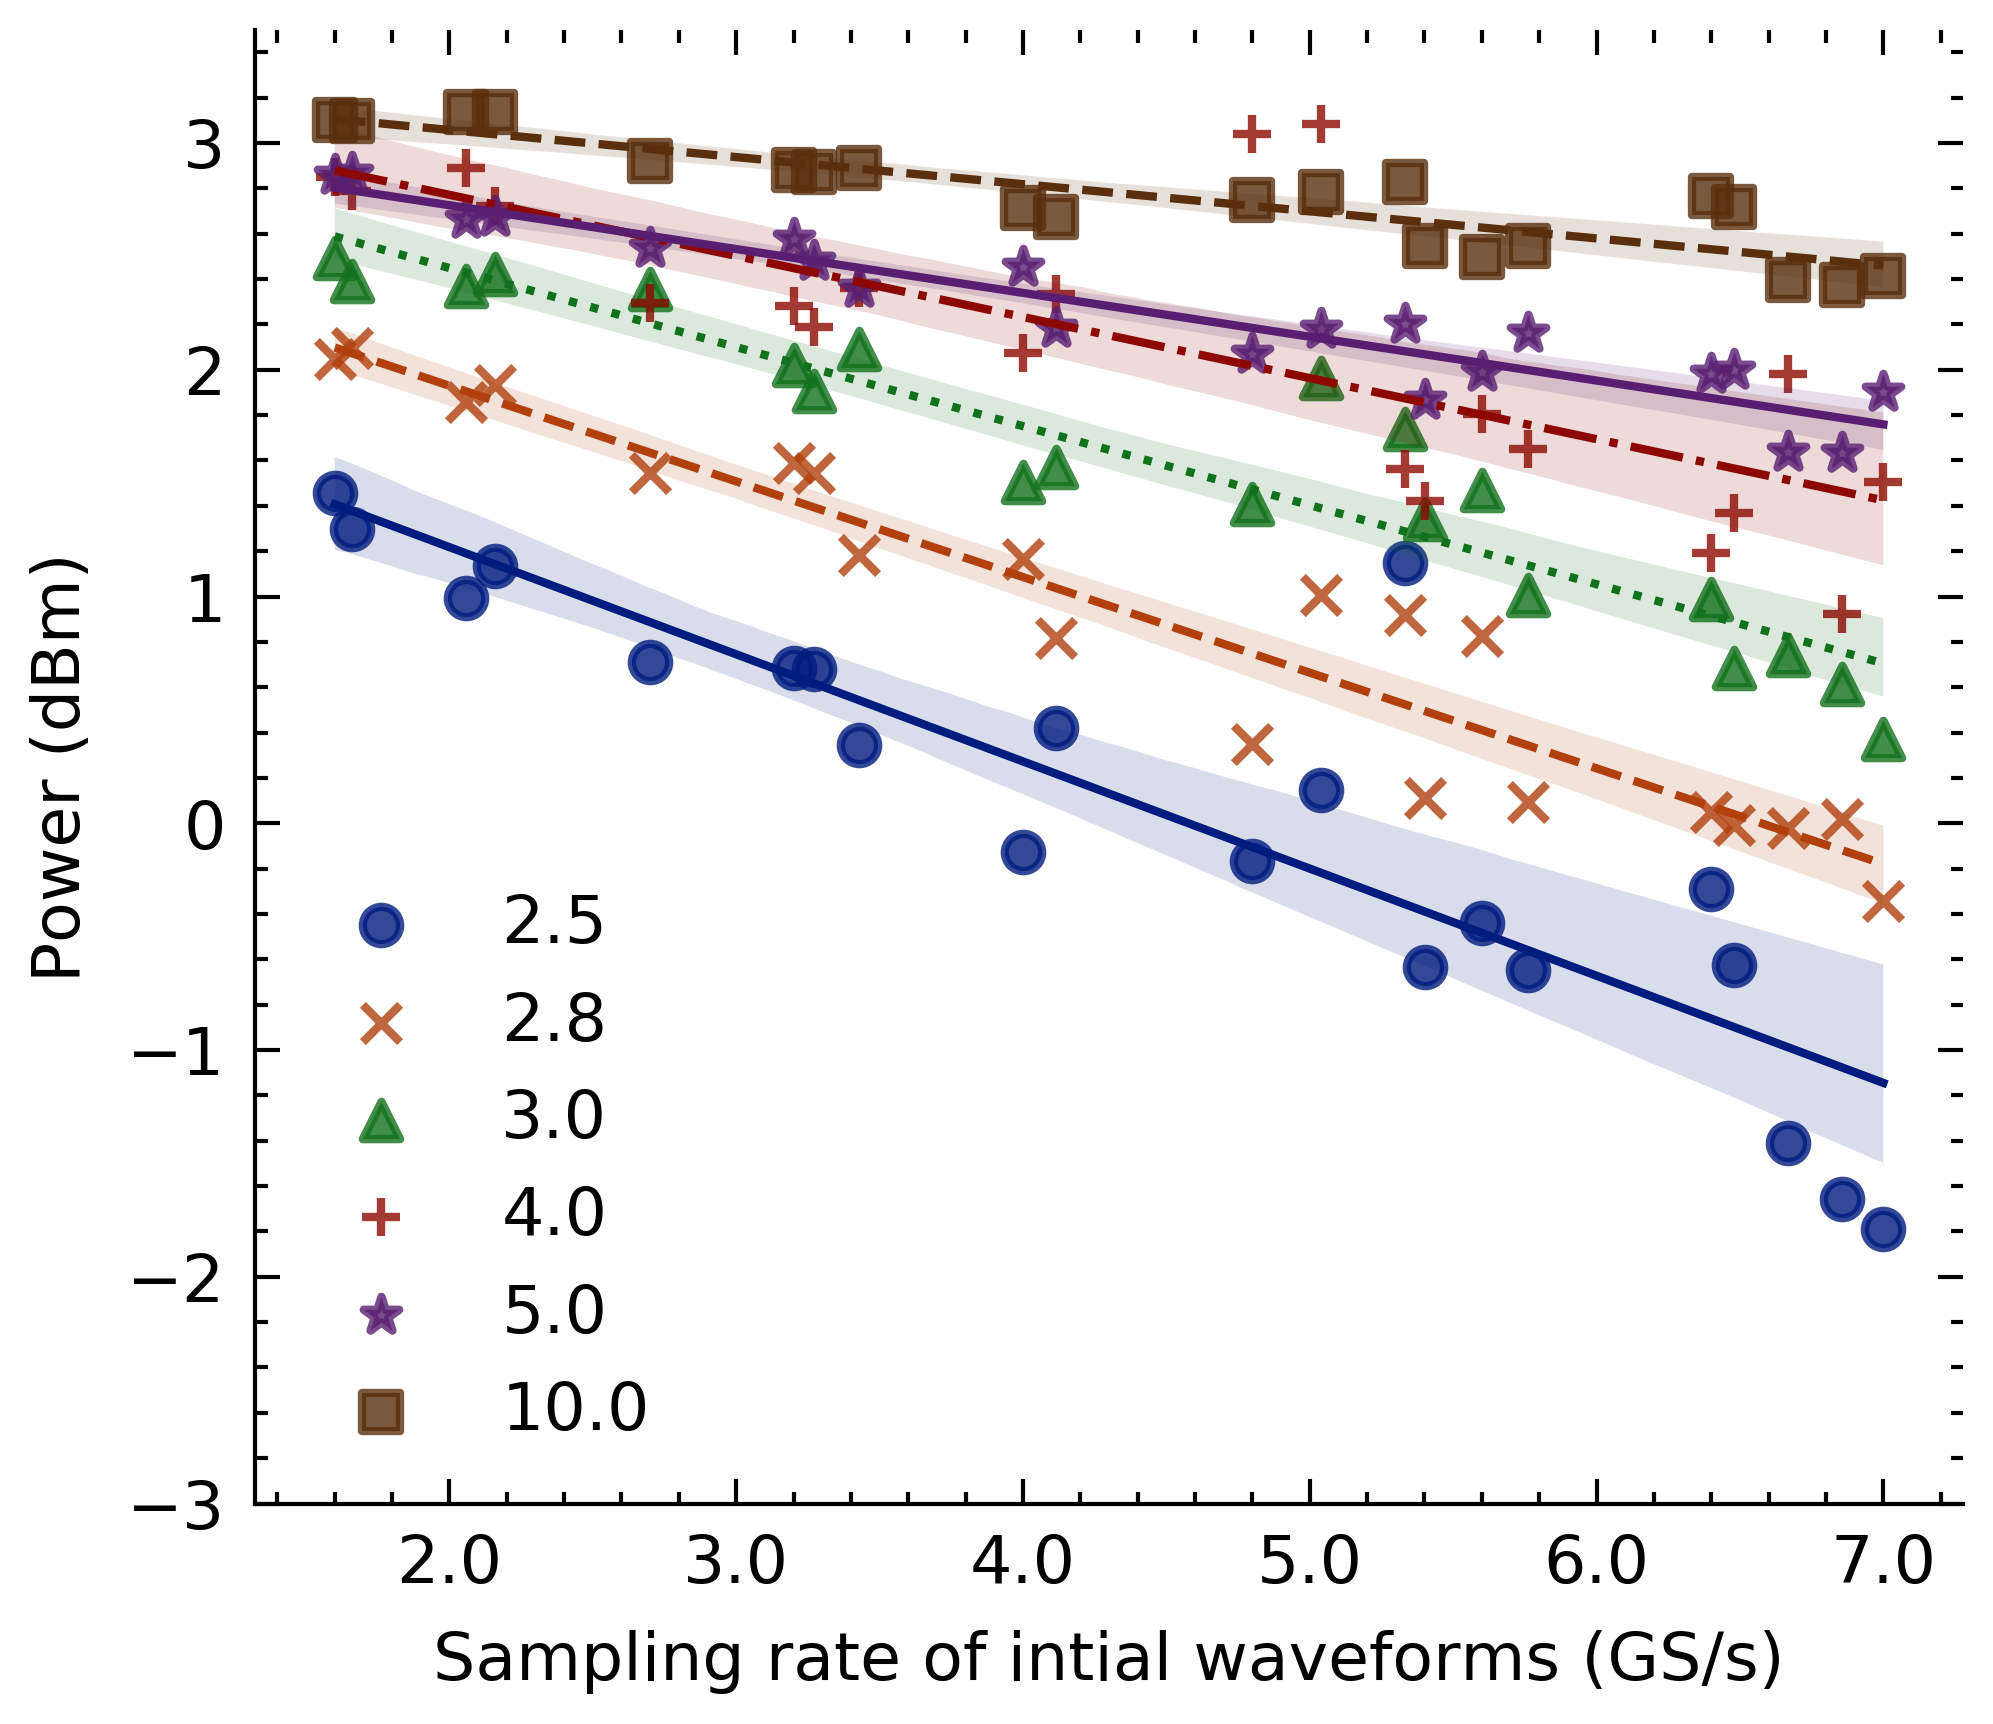

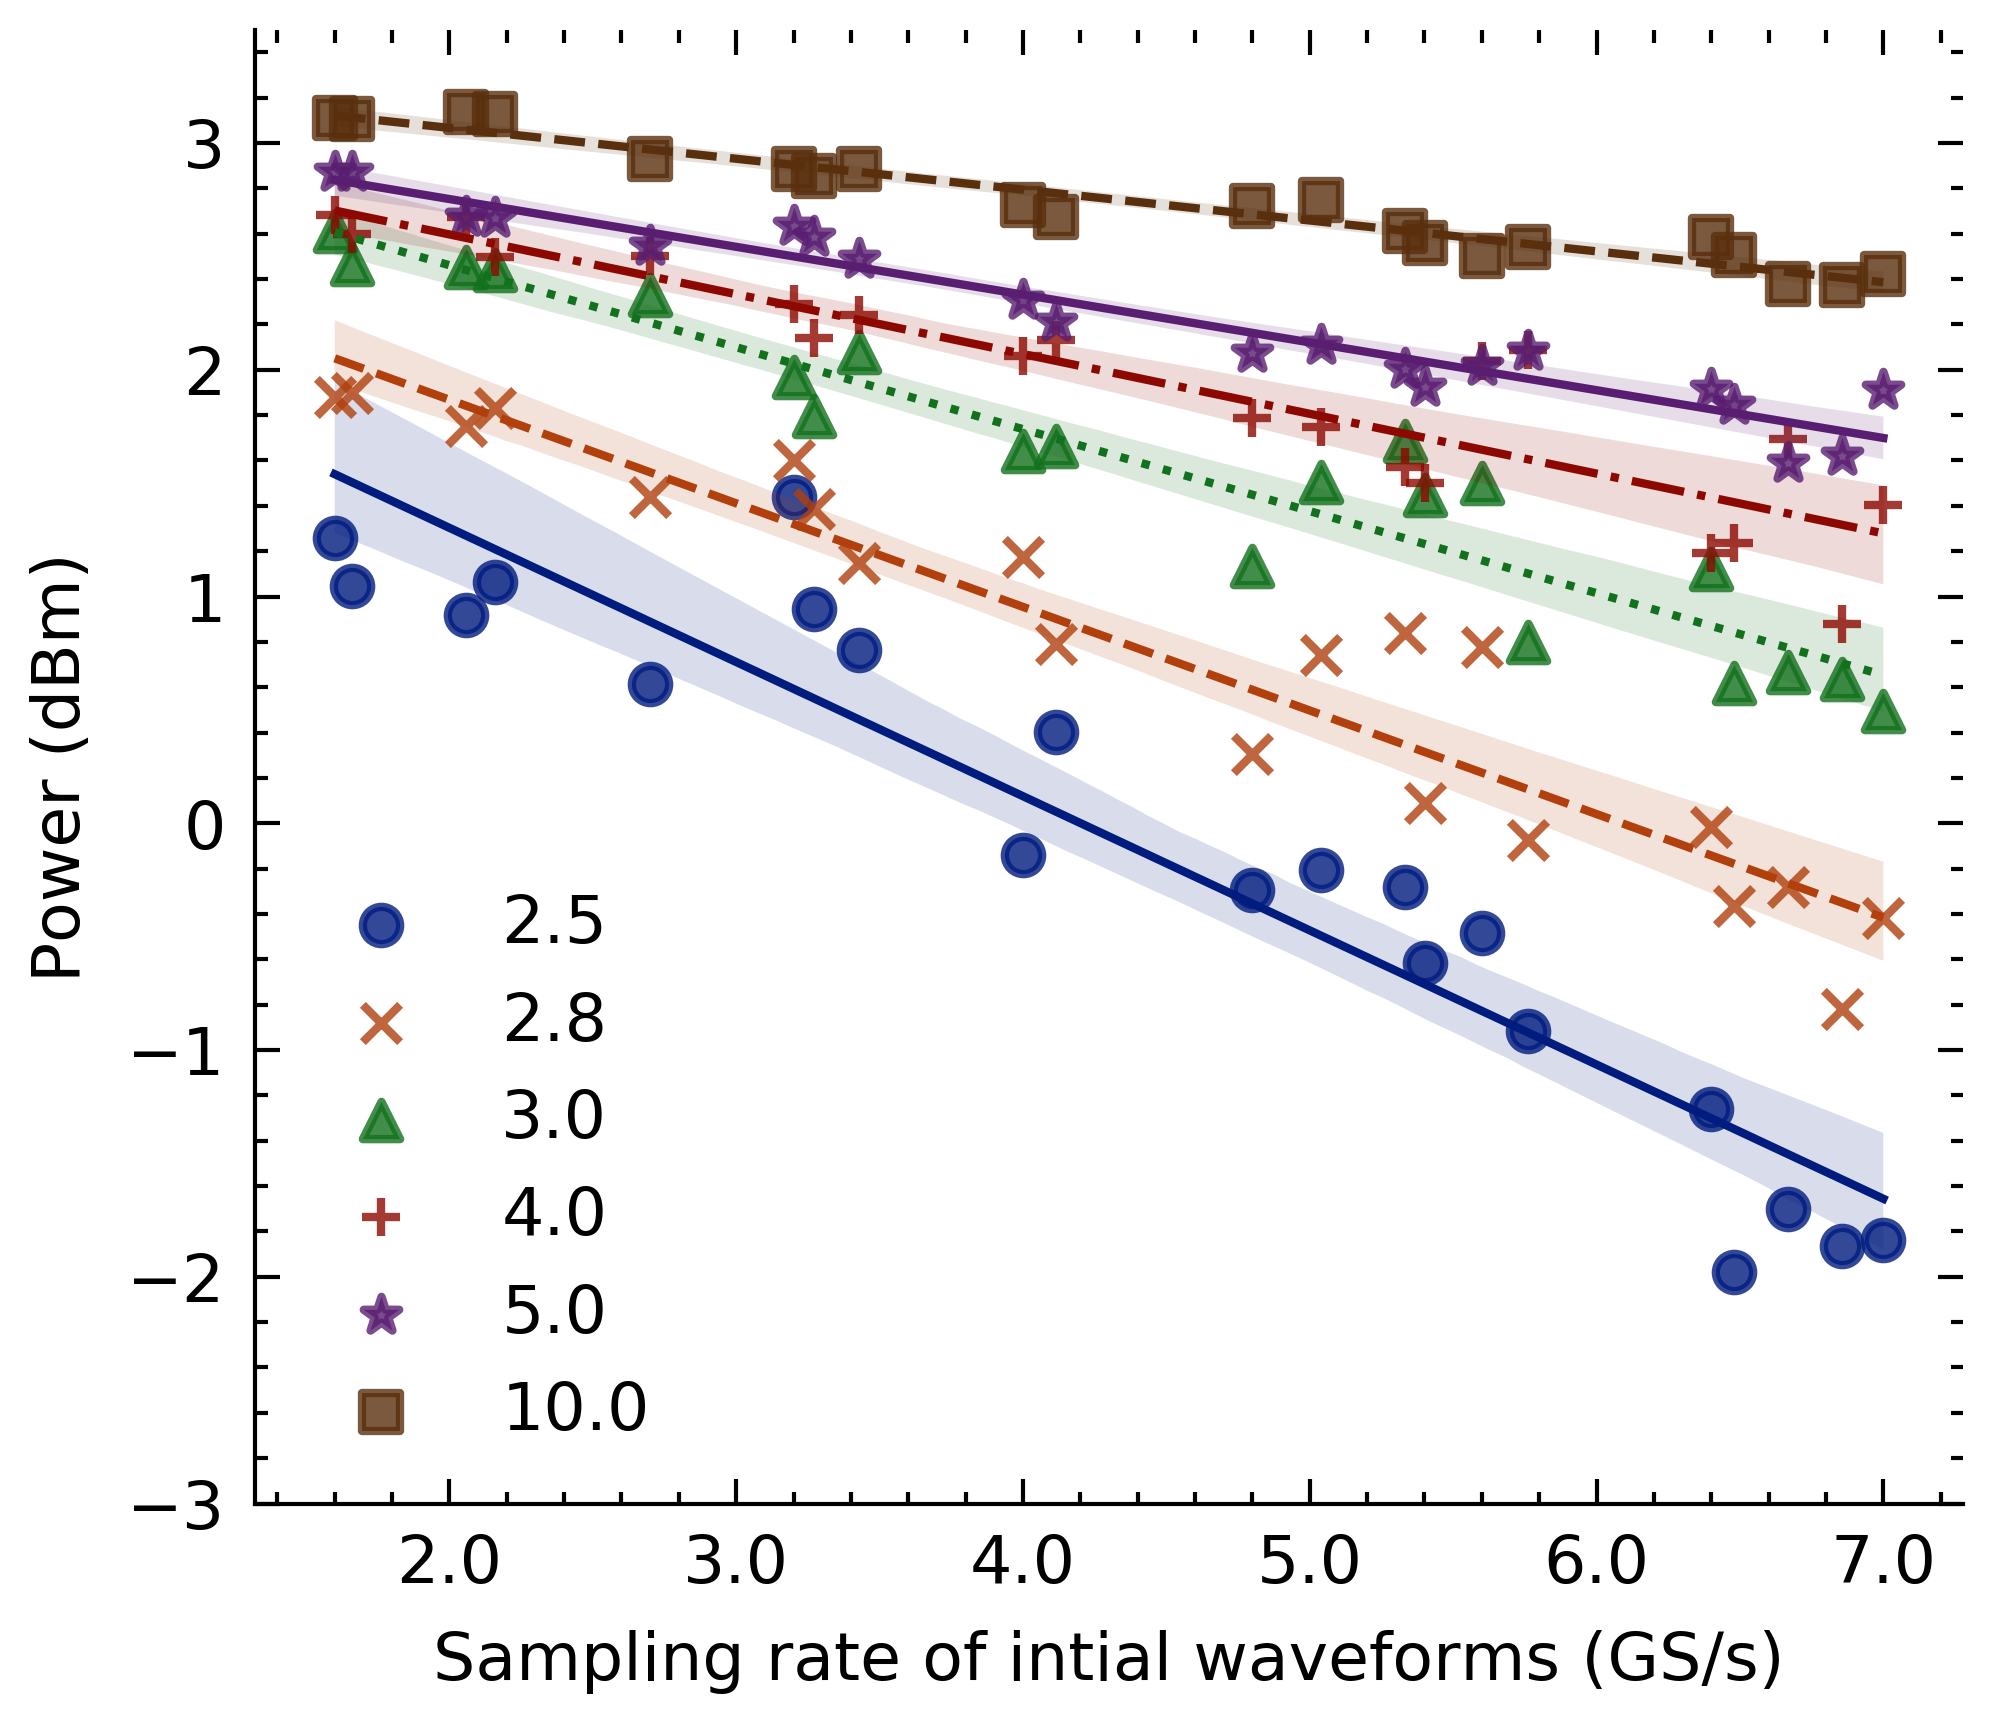

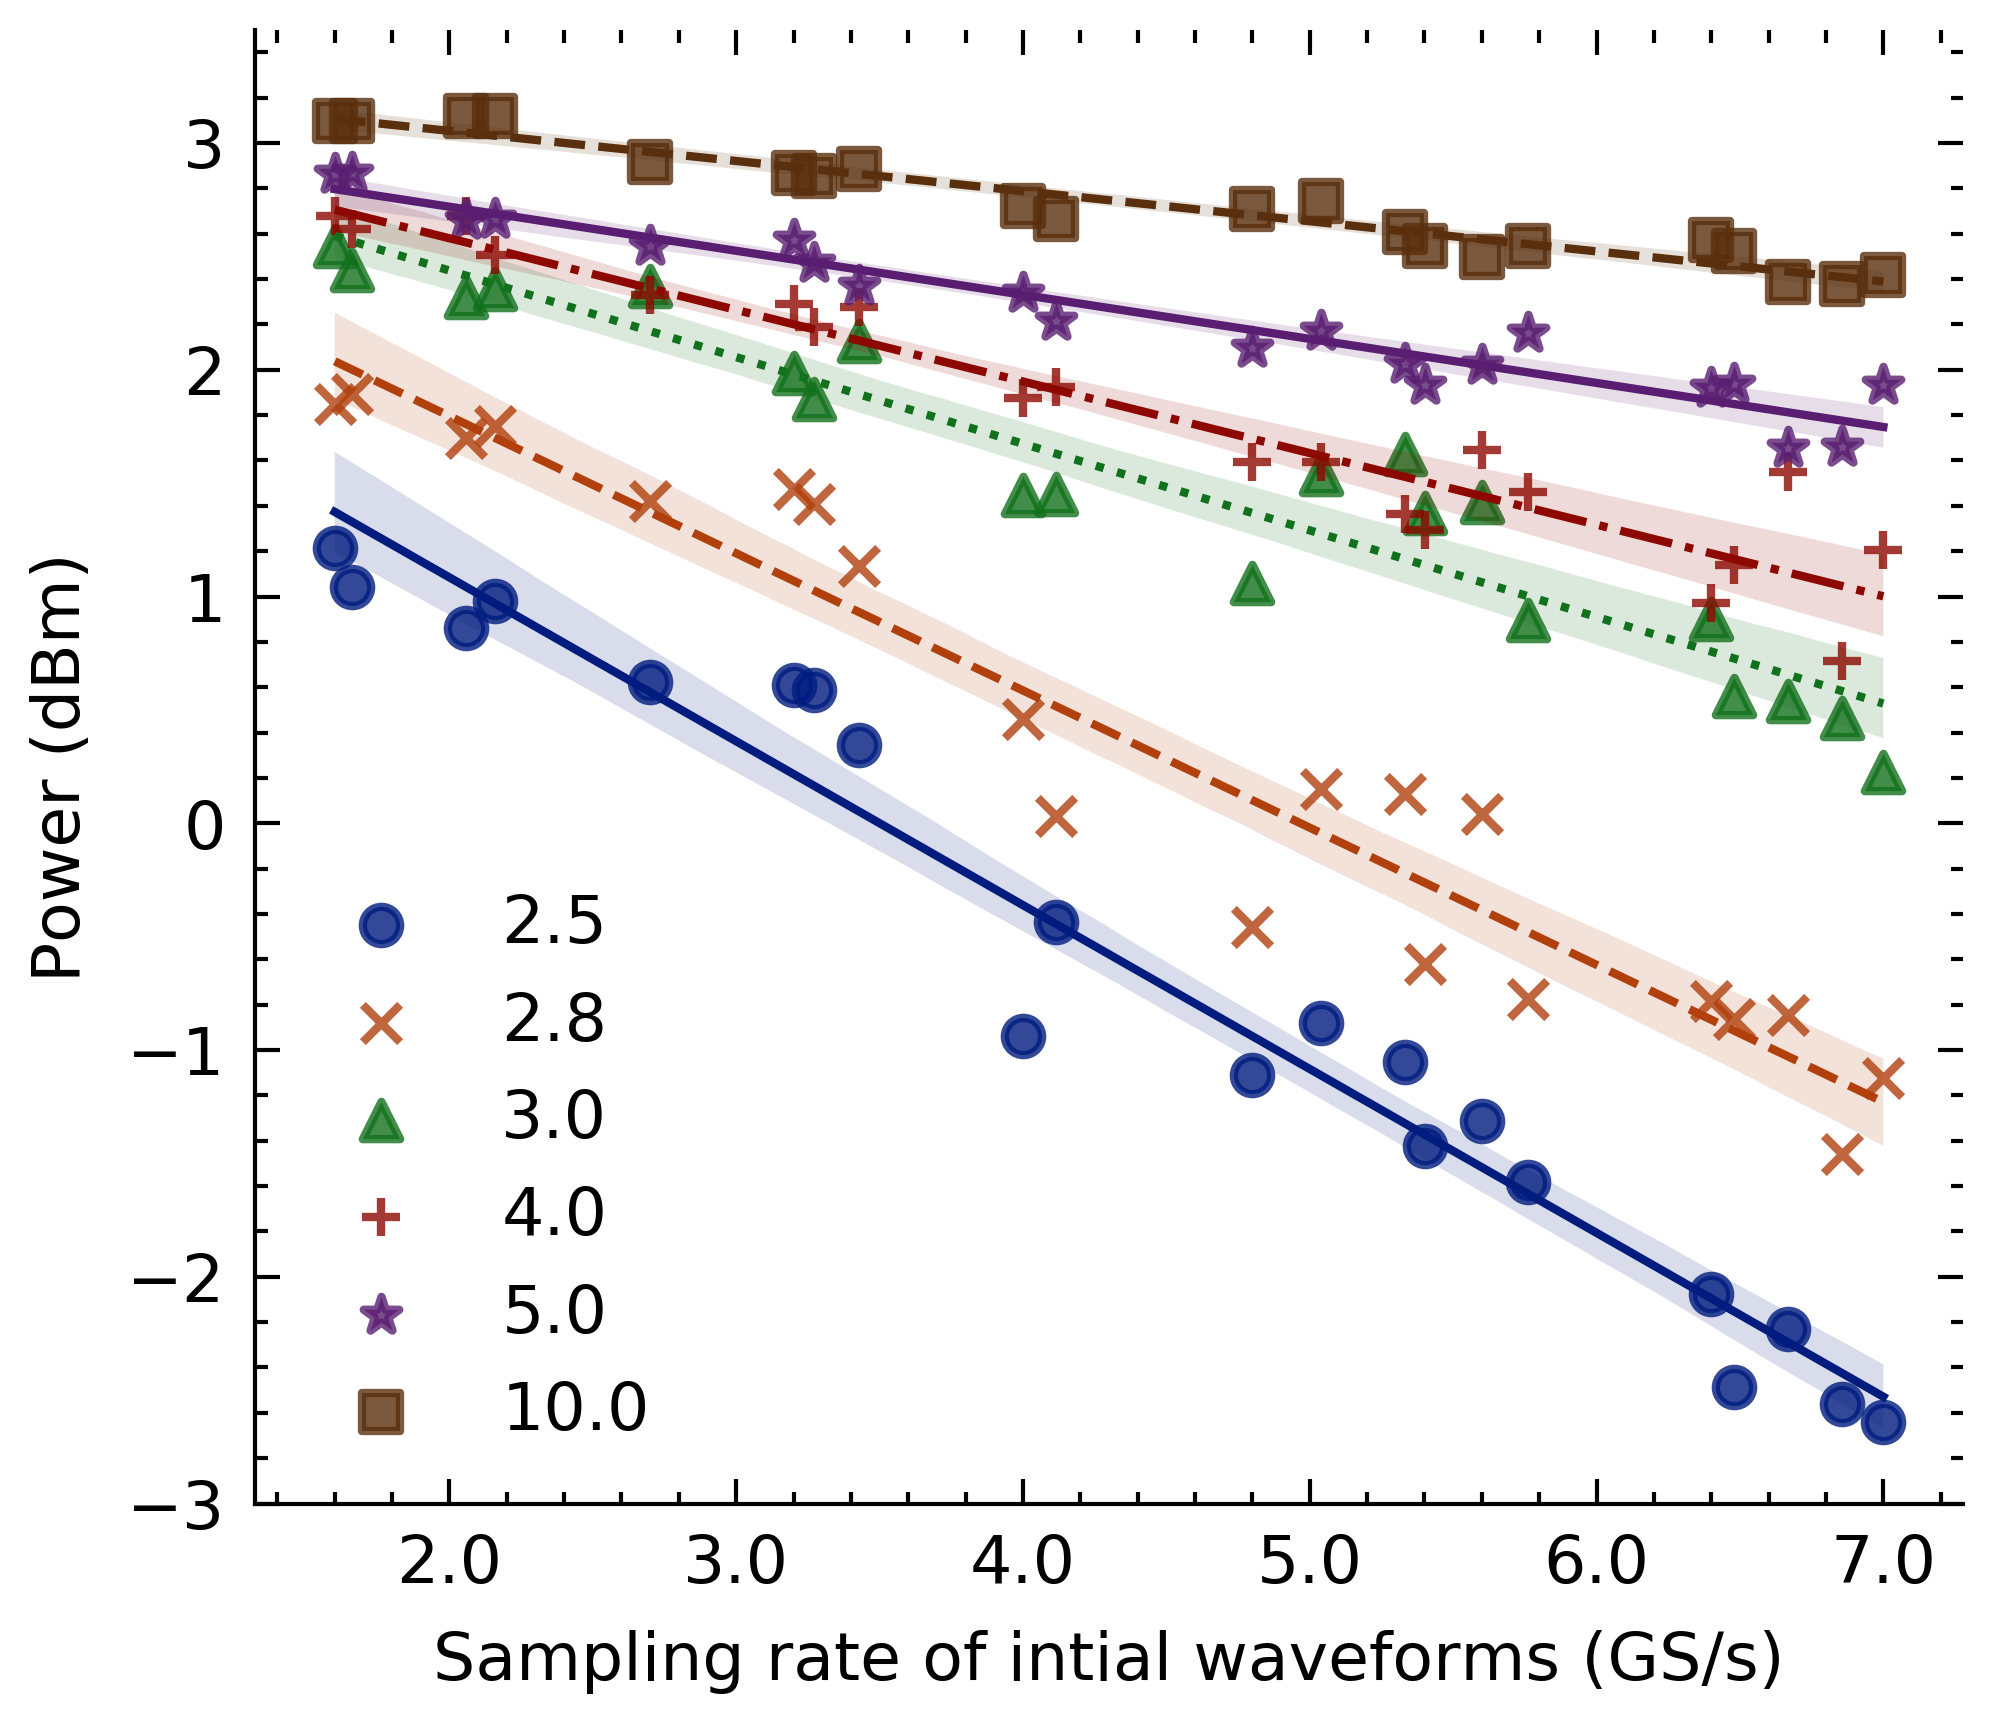

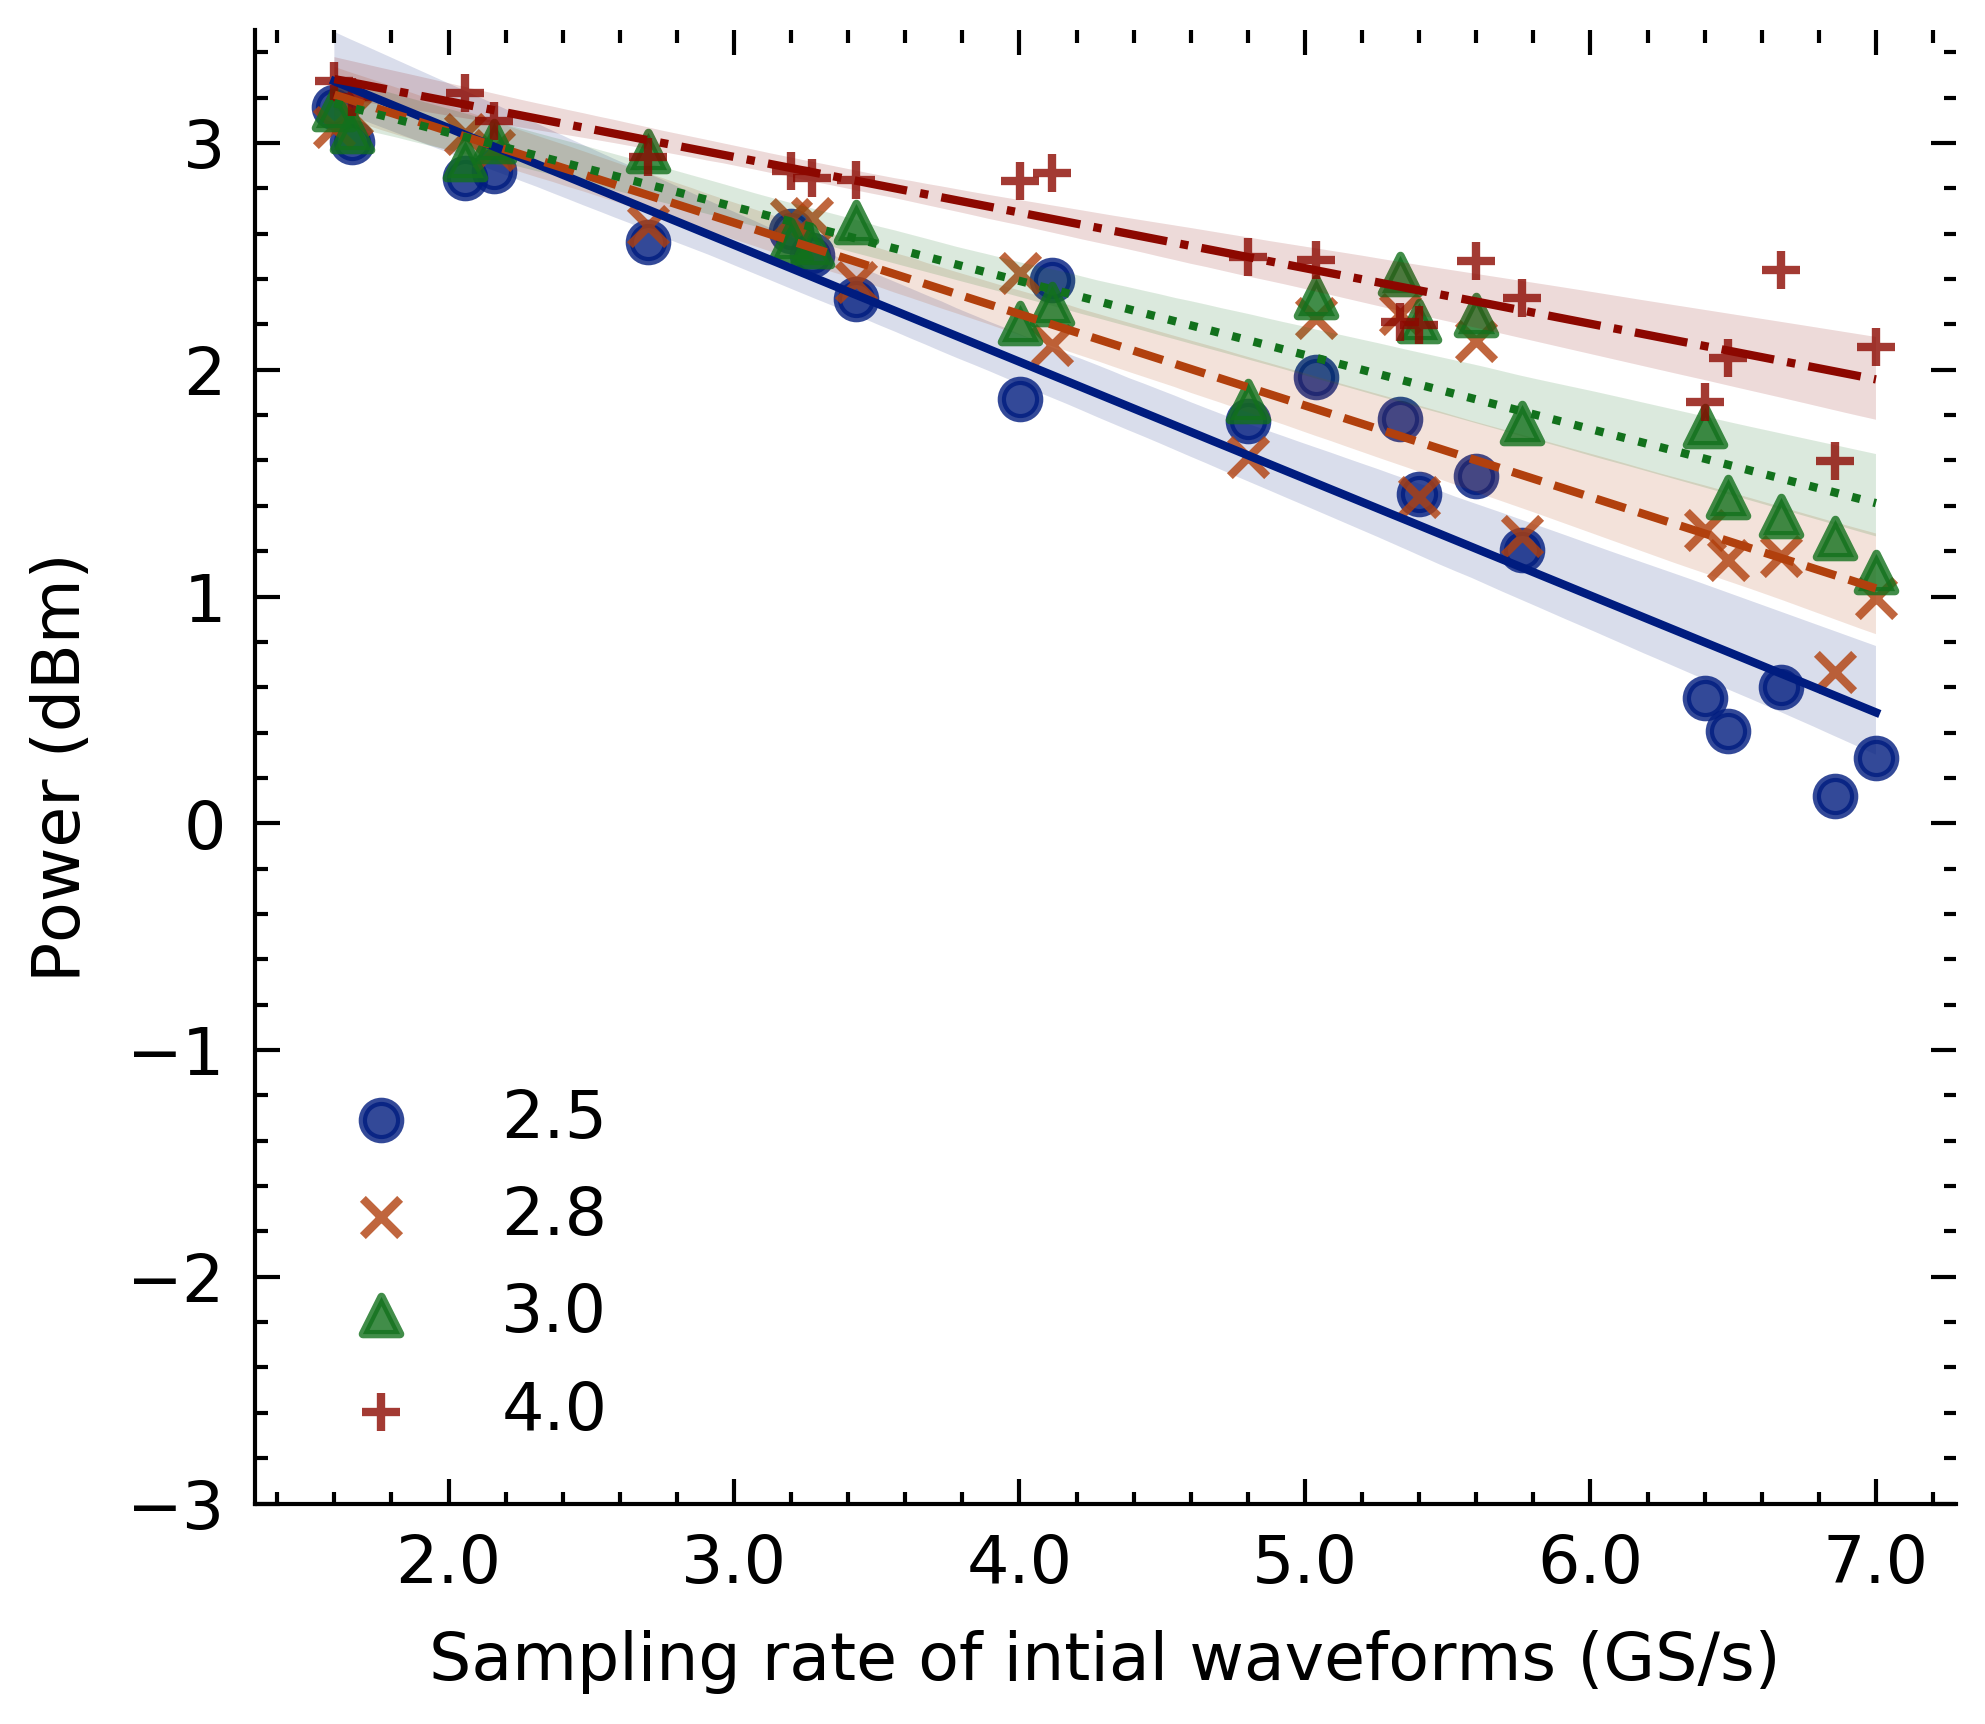

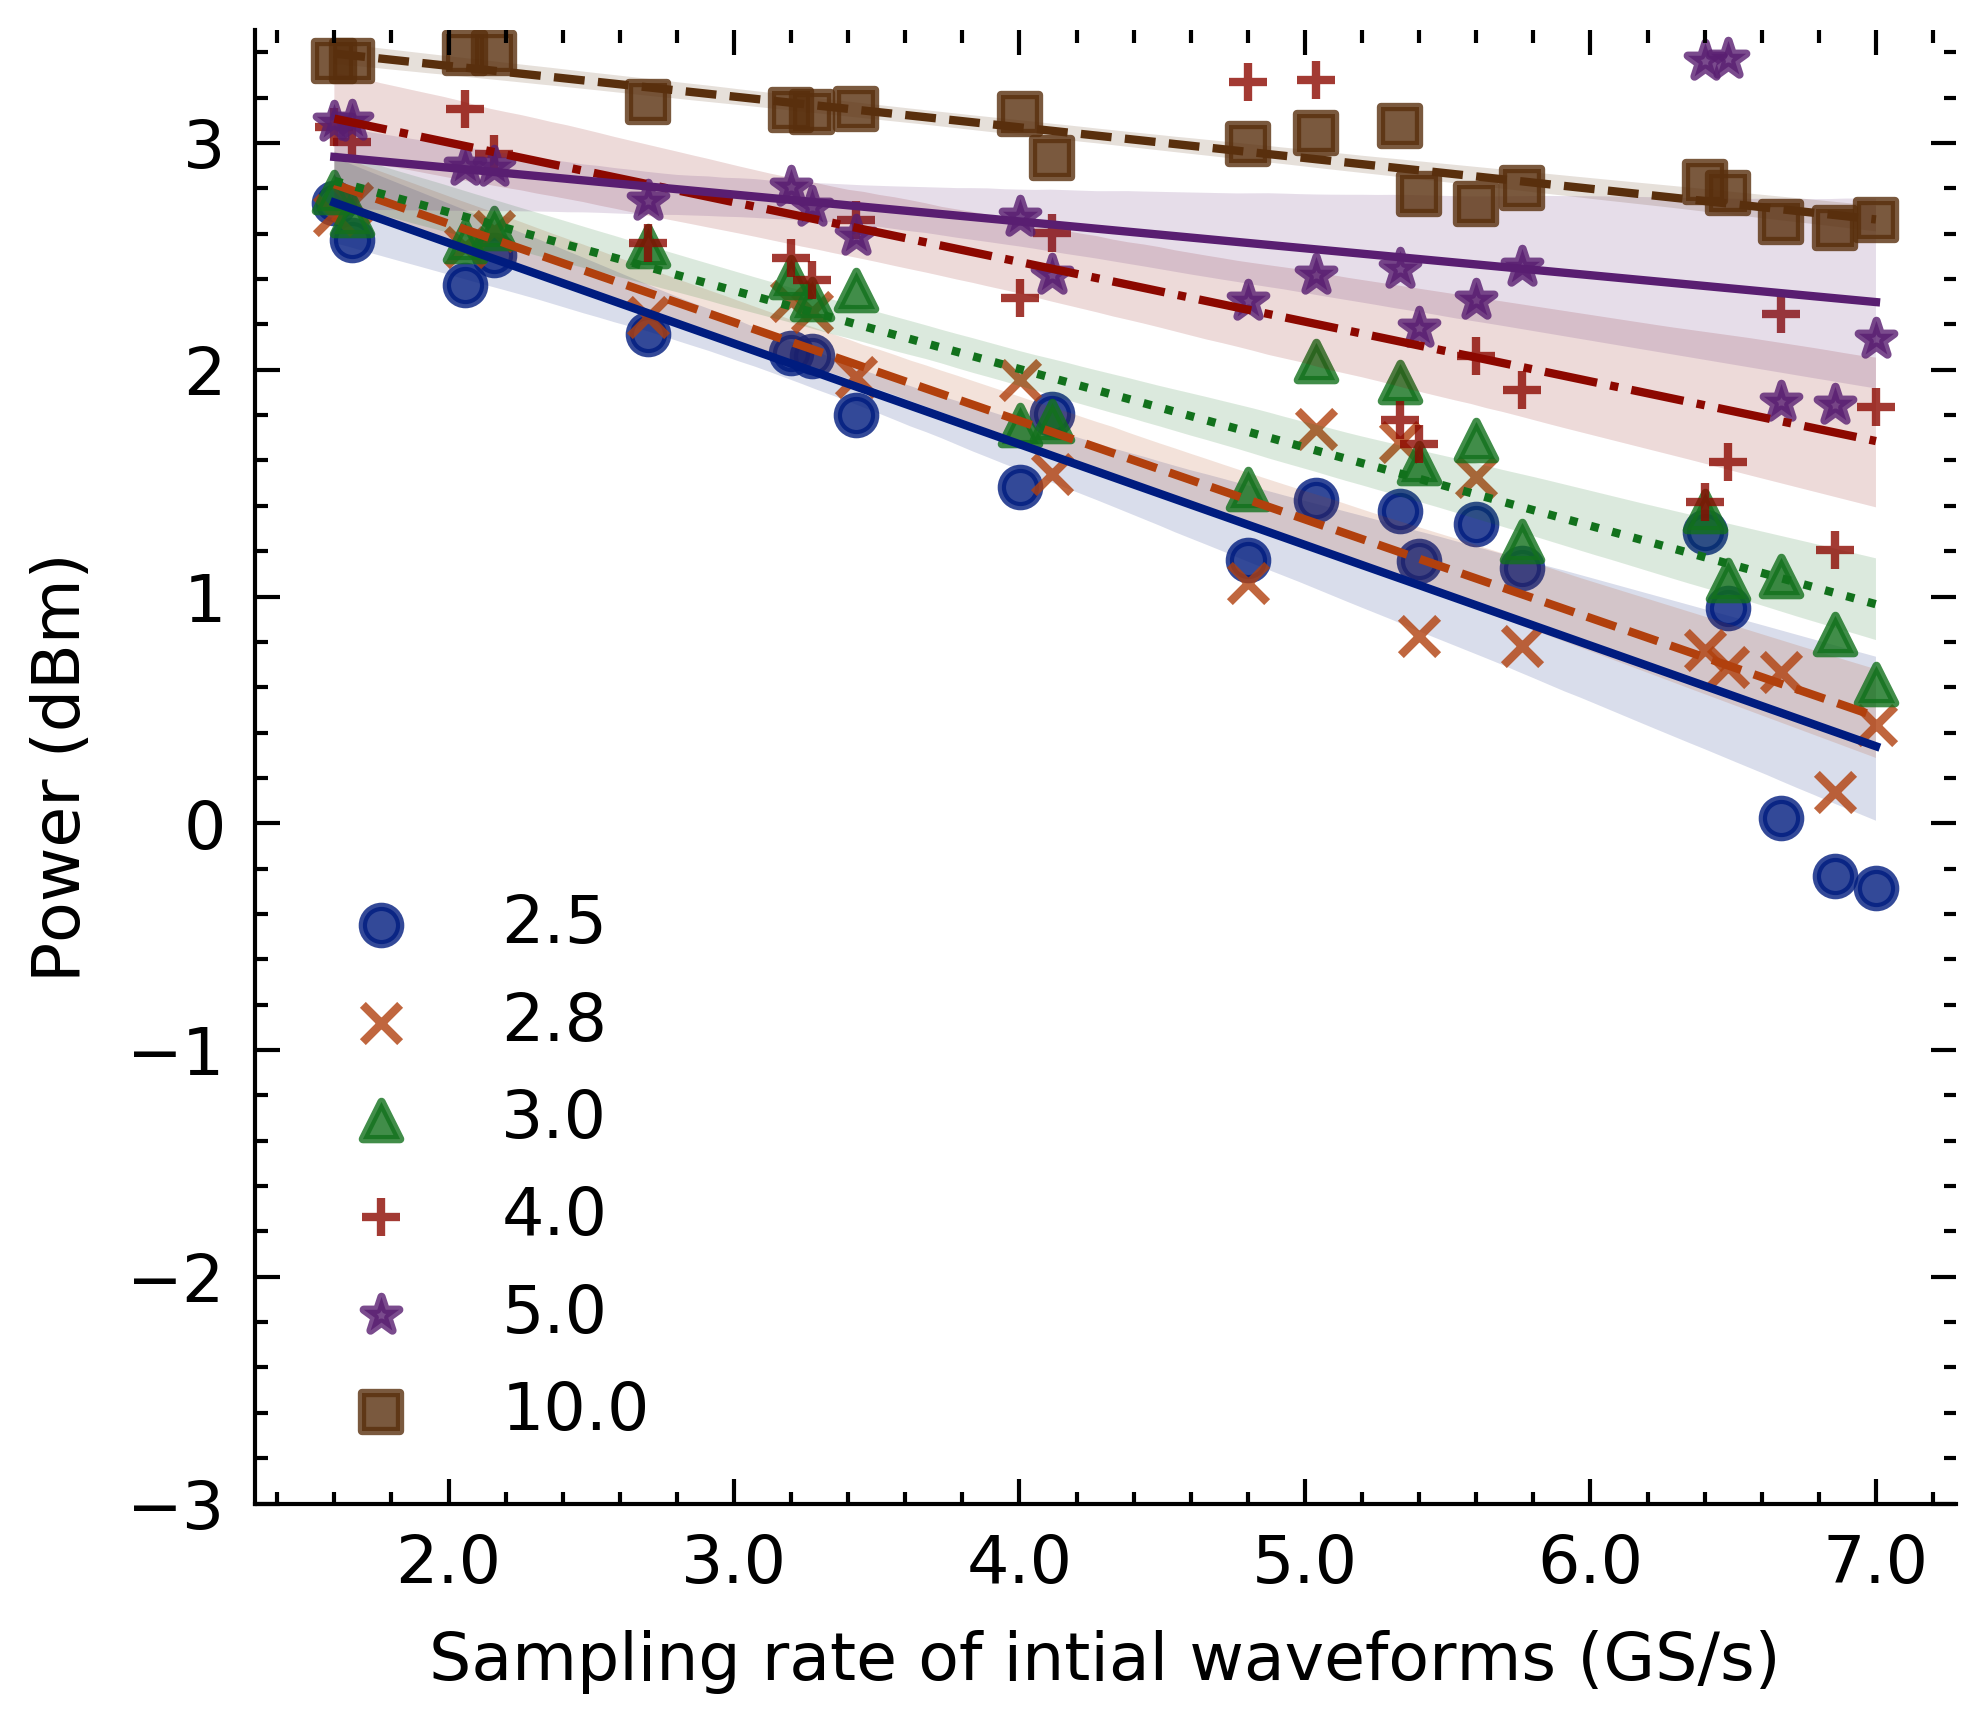

<IPython.core.display.Javascript object>

In [ ]:
all_methods = new_df["method"].unique()
for each in all_methods:
    draw_by_method(each)

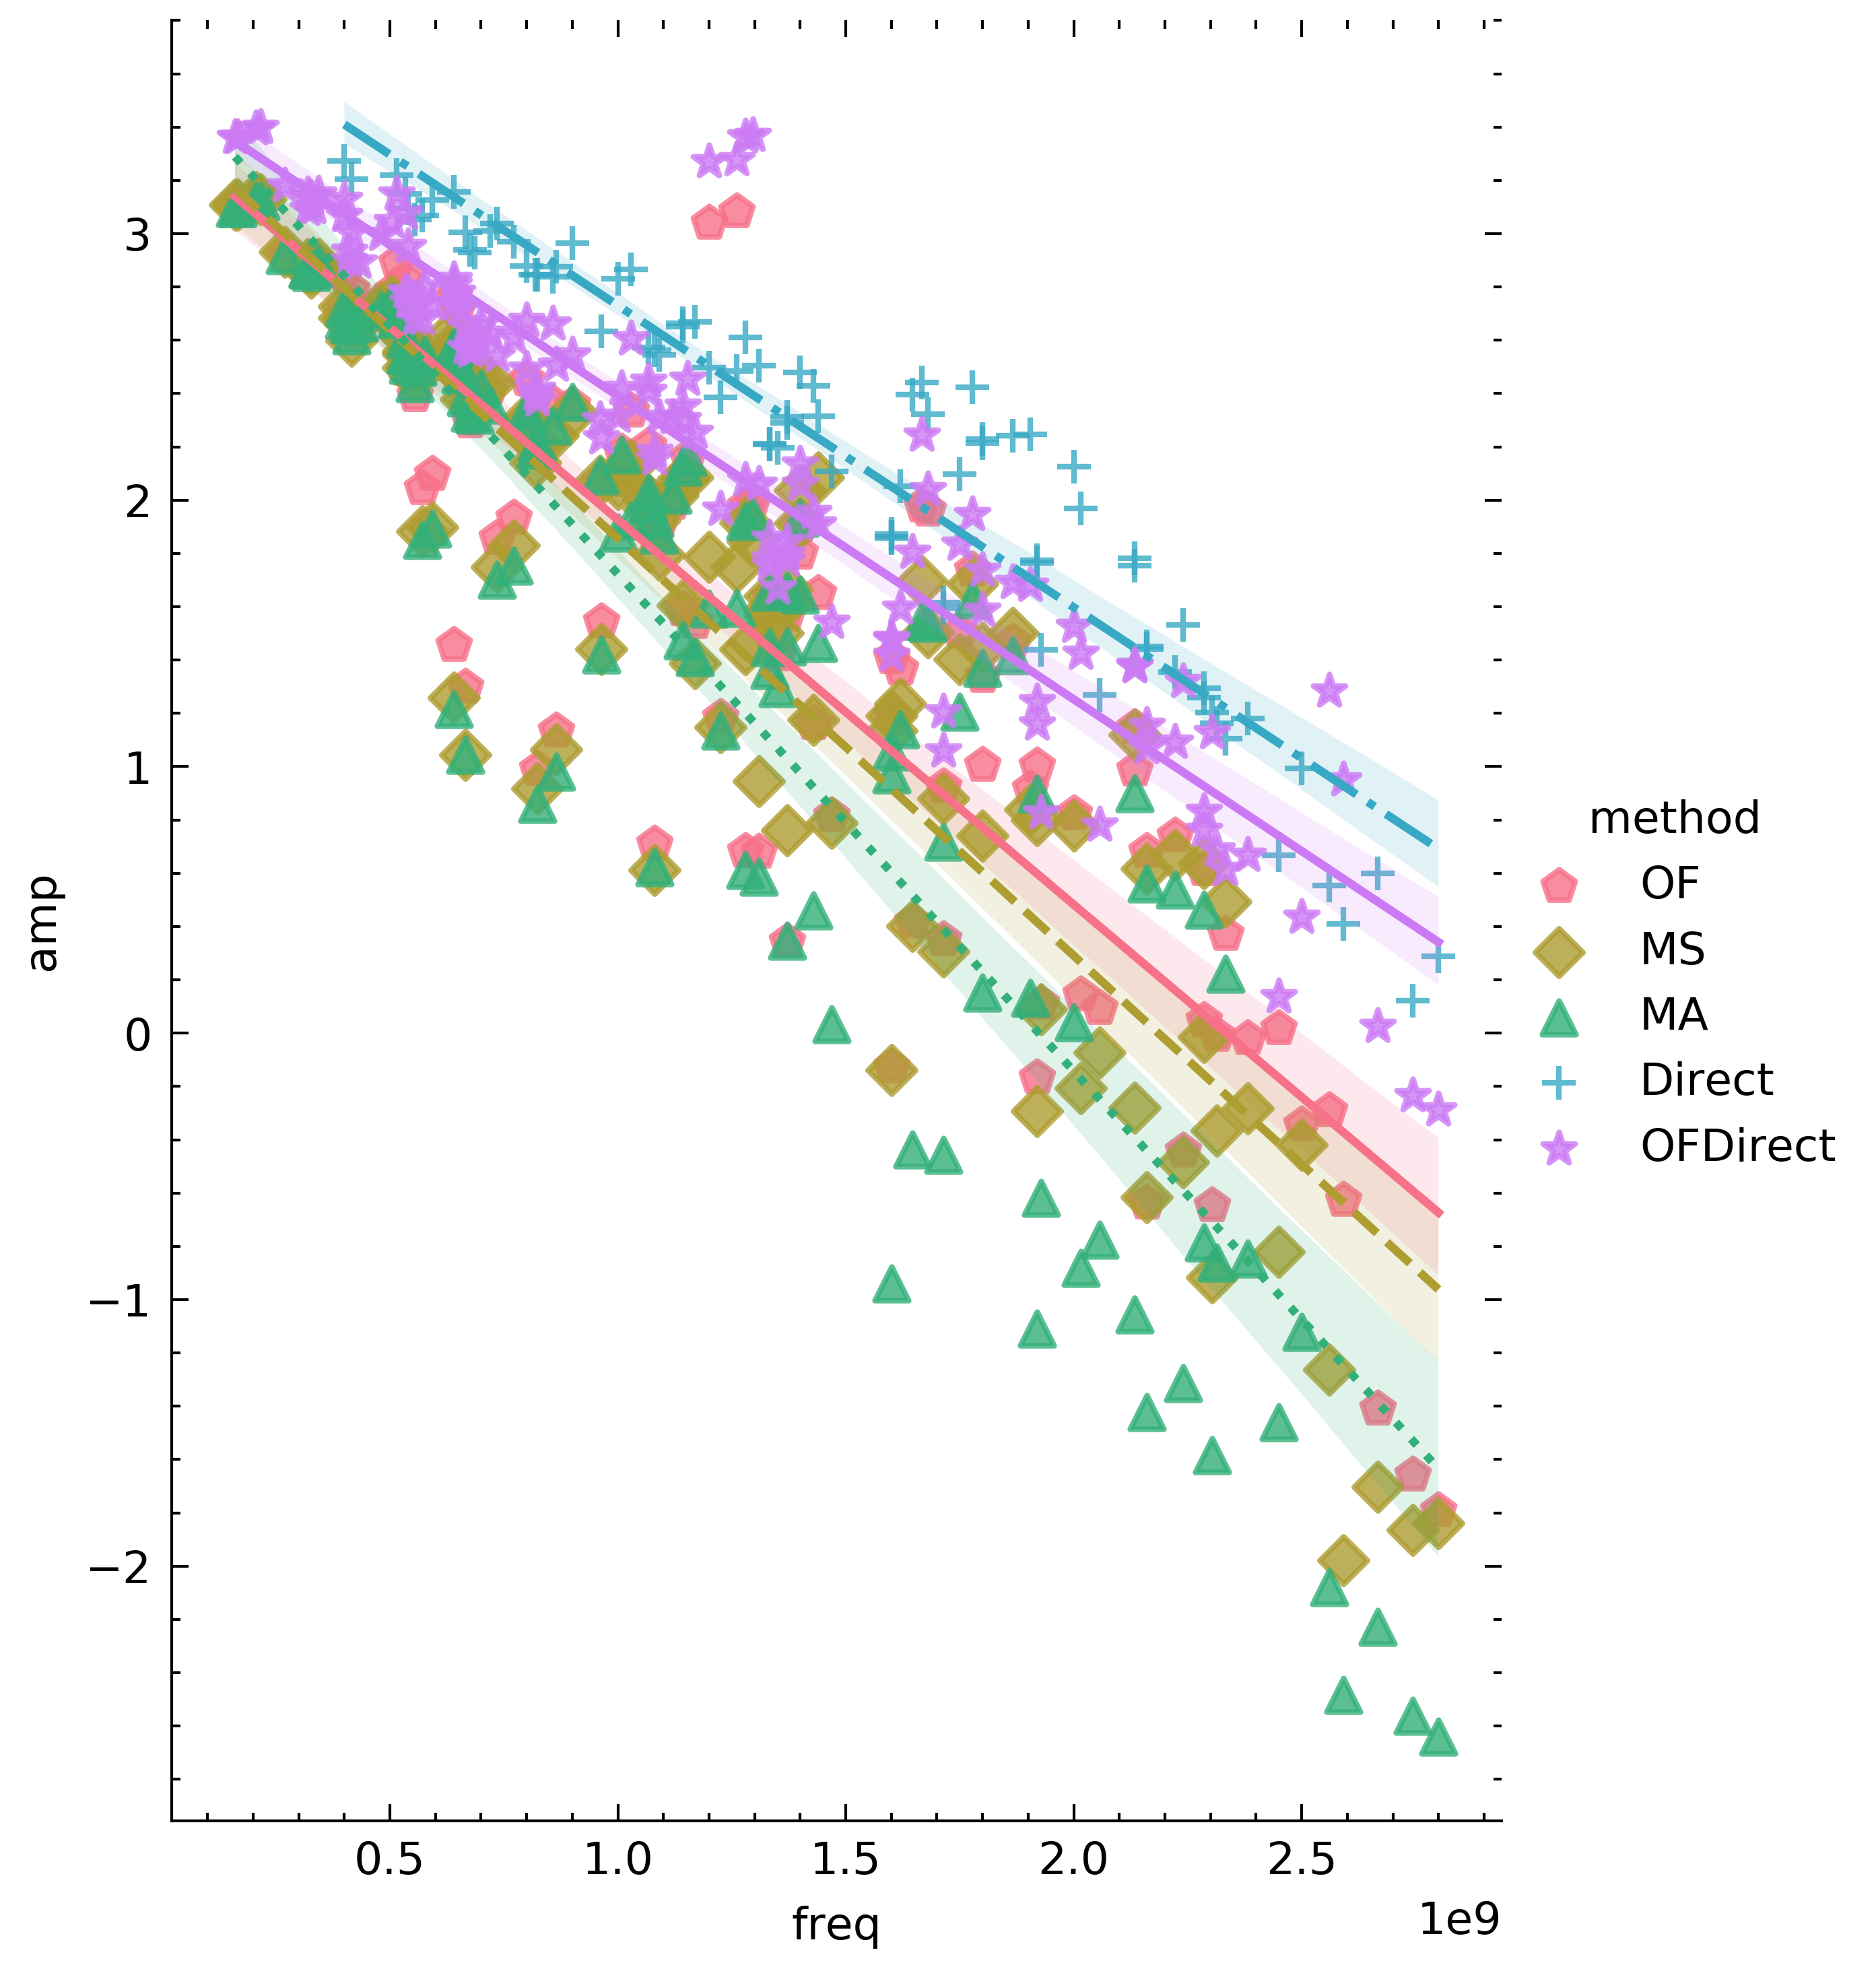

<IPython.core.display.Javascript object>

In [ ]:
markers = [next(mks) for i in new_df["method"].unique()]
sns.lmplot(
    data=new_df,
    x="freq",
    y="amp",
    hue="method",
    #     size="choice",
    markers=markers,
    #     col="method",
    #     kind="scatter",
    #     size_order=["T1", "T2"],
    height=5,
    aspect=0.75,
    #     facet_kws=dict(sharex=False),
)

In [ ]:
file = os.path.join(workdir, "selected.csv")
selected = pd.read_csv(file)
selected.drop("Unnamed: 0", inplace=True, axis=1)
selected

ofs   L   M method  section
0   1.600111e+09   9   2     OF        1
1   1.600111e+09  14   3     MS        1
2   1.600111e+09  14   3     ML        1
3   1.600111e+09   9   2     LS        1
4   1.600111e+09   9   2     LL        1
..           ...  ..  ..    ...      ...
100 7.000111e+09   9   8     OF        7
101 7.000111e+09  10   9     MS        7
102 7.000111e+09  10   9     ML        7
103 7.000111e+09  11  10     LS        7
104 7.000111e+09  11  10     LL        7

[105 rows x 5 columns]

<IPython.core.display.Javascript object>

In [ ]:
results

ofs  pts    method        target          rate  \
0   1.600111e+09   10        OF  1.600111e+08 7.2004995e+09   
1   1.600111e+09   10        MS  1.600111e+08 7.4671847e+09   
2   1.661711e+09   10        OF  1.661711e+08 7.4776995e+09   
3   1.661711e+09   10        MS  1.661711e+08 7.2007477e+09   
4   2.057311e+09   10        OF  2.057311e+08 7.2005885e+09   
..           ...  ...       ...           ...           ...   
583 6.400111e+09  2.5  OFDirect 2.5600444e+09 7.6801332e+09   
584 6.480111e+09  2.5  OFDirect 2.5920444e+09 7.7761332e+09   
585 6.666711e+09  2.5  OFDirect 2.6666844e+09 7.7778295e+09   
586 6.857311e+09  2.5  OFDirect 2.7429244e+09 7.8369269e+09   
587 7.000111e+09  2.5  OFDirect 2.8000444e+09 7.8751249e+09   

                     name    amp          freq   L   M  section    shift  
0    sin10_1600111000_opt  3.101 1.6001109e+08 nan nan        0  -13.687  
1     sin10_1600111000_ms  3.109 1.6001109e+08 nan nan        0  -12.754  
2    sin10_1661711000_opt  3.096 1.6617109e+08 nan nan        0  -13.789  
3     sin10_1661711000_ms  3.108 1.6617109e+08 nan nan        0  -13.546  
4    sin10_2057311000_opt  3.136 2.0573108e+08 nan nan        0  -17.433  
..                    ...    ...           ...  ..  ..      ...      ...  
583              OFdirect  1.284 2.5600442e+09   6   5        5 -176.342  
584              OFdirect  0.951 2.5920442e+09   6   5        5 -177.033  
585              OFdirect  0.025 2.6666842e+09   7   6        5 -183.053  
586              OFdirect -0.234 2.7429242e+09   8   7        5 -172.946  
587              OFdirect -0.287 2.8000442e+09   9   8        5 -182.715  

[588 rows x 12 columns]

<IPython.core.display.Javascript object>

In [ ]:
df1 = results[results["method"].isin(["OF"])].drop(
    columns=["section", "target", "L", "M"]
)
df2 = selected[selected["method"].isin(["OF"])]
df_ratio = df1.merge(df2, on=["ofs", "method"])
df_ratio

ofs  pts method          rate                   name    amp  \
0   1.600111e+09   10     OF 7.2004995e+09   sin10_1600111000_opt  3.101   
1   1.600111e+09    5     OF 7.2004995e+09    sin5_1600111000_opt  2.857   
2   1.600111e+09    4     OF 7.2004995e+09    sin4_1600111000_opt  2.851   
3   1.600111e+09    3     OF 7.2004995e+09    sin3_1600111000_opt  2.492   
4   1.600111e+09  2.8     OF 7.2004995e+09  sin2.8_1600111000_opt  2.046   
..           ...  ...    ...           ...                    ...    ...   
121 7.000111e+09    5     OF 7.8751249e+09    sin5_7000111000_opt  1.904   
122 7.000111e+09    4     OF 7.8751249e+09    sin4_7000111000_opt  1.506   
123 7.000111e+09    3     OF 7.8751249e+09    sin3_7000111000_opt  0.371   
124 7.000111e+09  2.8     OF 7.8751249e+09  sin2.8_7000111000_opt -0.344   
125 7.000111e+09  2.5     OF 7.8751249e+09  sin2.5_7000111000_opt  -1.79   

             freq      shift  L  M  section  
0   1.6001109e+08    -13.687  9  2        1  
1   3.2002217e+08    -27.272  9  2        1  
2   4.0002772e+08    -33.966  9  2        1  
3   5.3337029e+08 -44.539333  9  2        1  
4   5.7146817e+08 -48.602714  9  2        1  
..            ...        ... .. ..      ...  
121 1.4000221e+09   -114.282  9  8        7  
122 1.7500276e+09   -142.213  9  8        7  
123 2.3333701e+09 -190.78433  9  8        7  
124 2.5000394e+09 -204.41114  9  8        7  
125 2.8000442e+09   -230.266  9  8        7  

[126 rows x 11 columns]

<IPython.core.display.Javascript object>

In [ ]:
df_ratio = results[results["method"].isin(["OFDirect"])]
df_ratio

ofs  pts    method        target          rate      name    amp  \
462 1.600111e+09   10  OFDirect  1.600111e+08 7.2004995e+09  OFdirect   3.36   
463 1.661711e+09   10  OFDirect  1.661711e+08 7.4776995e+09  OFdirect  3.362   
464 2.057311e+09   10  OFDirect  2.057311e+08 7.2005885e+09  OFdirect  3.395   
465 2.160111e+09   10  OFDirect  2.160111e+08 7.5603885e+09  OFdirect  3.399   
466 2.700111e+09   10  OFDirect  2.700111e+08  7.200296e+09  OFdirect   3.18   
..           ...  ...       ...           ...           ...       ...    ...   
583 6.400111e+09  2.5  OFDirect 2.5600444e+09 7.6801332e+09  OFdirect  1.284   
584 6.480111e+09  2.5  OFDirect 2.5920444e+09 7.7761332e+09  OFdirect  0.951   
585 6.666711e+09  2.5  OFDirect 2.6666844e+09 7.7778295e+09  OFdirect  0.025   
586 6.857311e+09  2.5  OFDirect 2.7429244e+09 7.8369269e+09  OFdirect -0.234   
587 7.000111e+09  2.5  OFDirect 2.8000444e+09 7.8751249e+09  OFdirect -0.287   

             freq  L  M  section    shift  
462 1.6001109e+08  9  2        0   -9.414  
463 1.6617109e+08  9  2        0   -9.606  
464 2.0573109e+08  7  2        0  -12.455  
465 2.1601109e+08  7  2        0  -12.985  
466 2.7001108e+08  8  3        0  -16.354  
..            ... .. ..      ...      ...  
583 2.5600442e+09  6  5        5 -176.342  
584 2.5920442e+09  6  5        5 -177.033  
585 2.6666842e+09  7  6        5 -183.053  
586 2.7429242e+09  8  7        5 -172.946  
587 2.8000442e+09  9  8        5 -182.715  

[126 rows x 12 columns]

<IPython.core.display.Javascript object>

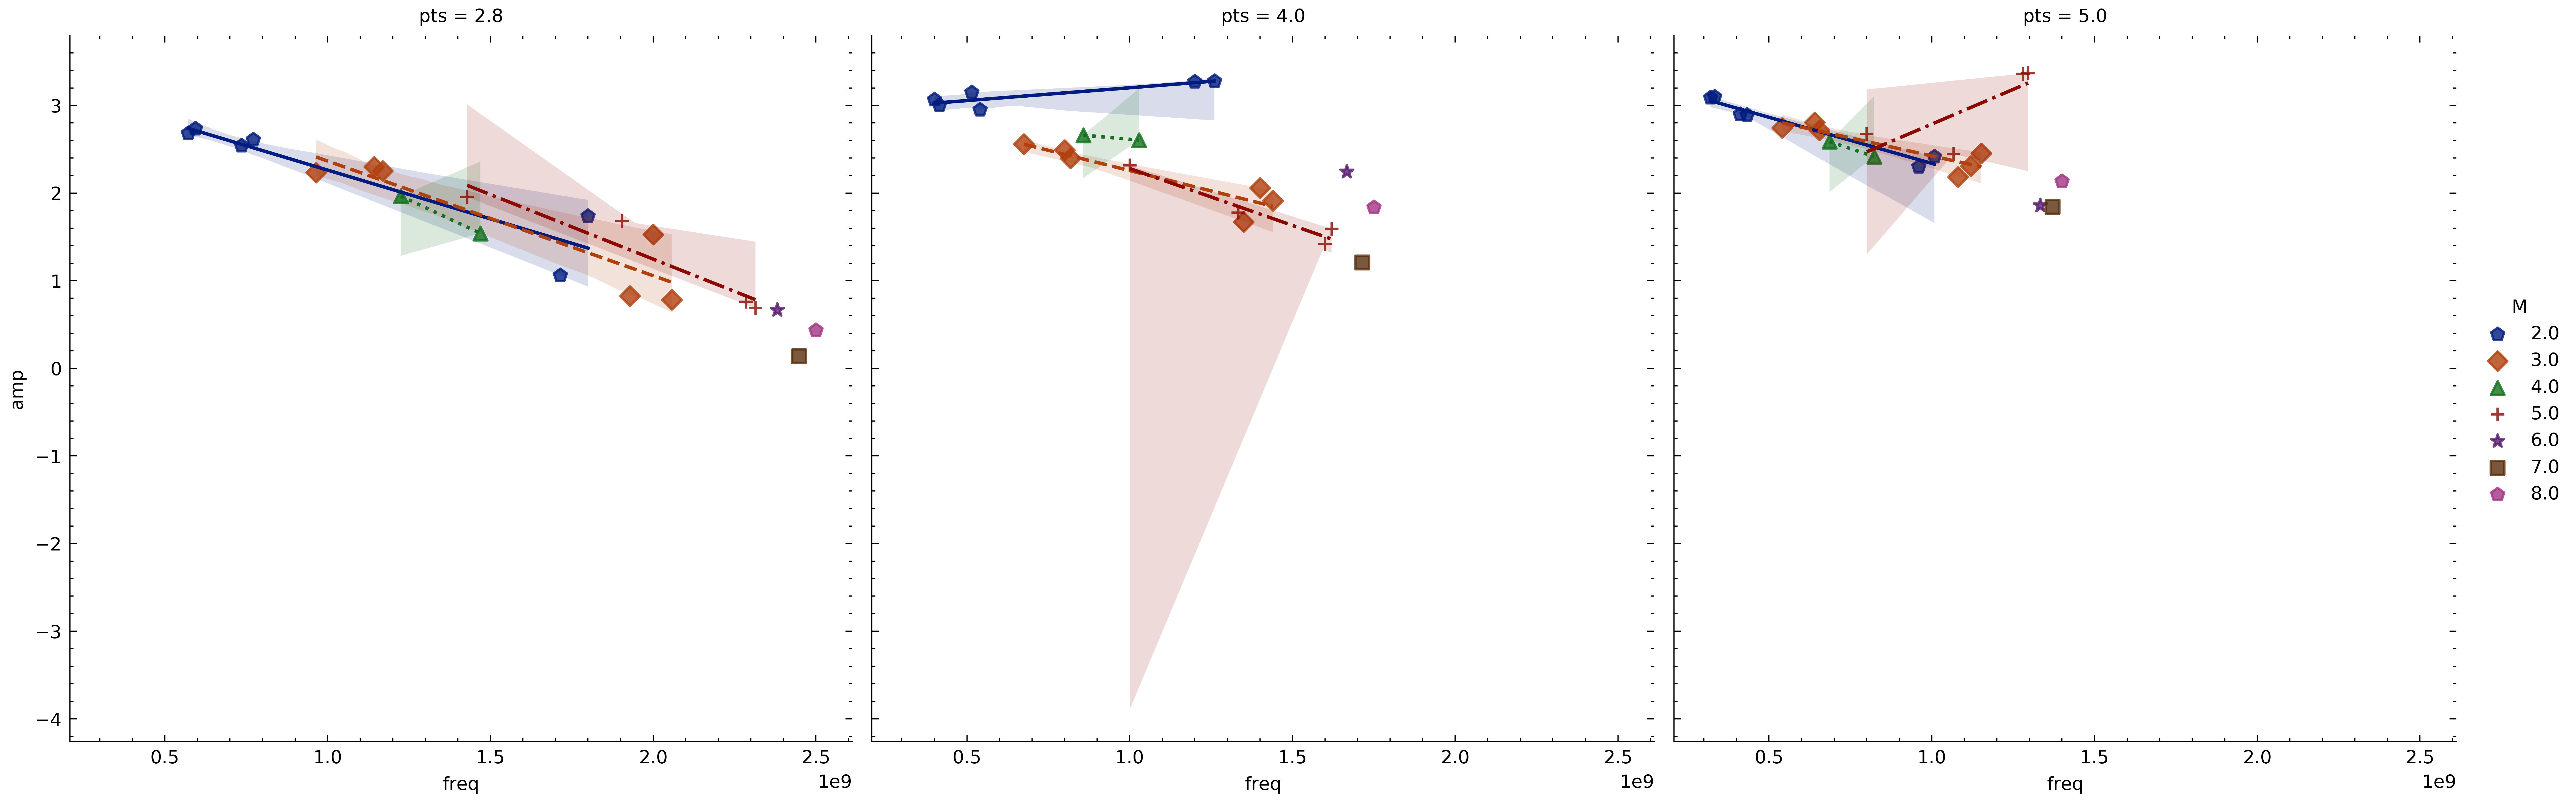

<IPython.core.display.Javascript object>

In [ ]:
target = df_ratio[df_ratio["pts"].isin([2.8, 4, 5])]
hue = "M"
markers = [next(mks) for i in target[hue].unique()]
ax = sns.lmplot(
    data=target,
    x="freq",
    y="amp",
    hue=hue,
    col="pts",
    markers=markers,
    #     height=5,
    palette="dark",
)